# Clase 23: Análisis Multivariado I

Para abrir en Google Colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase23_AnalisisMultivariadoI.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q # datasets de R
!pip install scikit-learn -q # Análisis relacionados a Machine Learning
!pip install pingouin -q # Análisis estadísticos
!pip install pyDOE3 -q # Creación de diseño experimental
!pip install plotly -q # visualizaciónes
!pip install yellowbrick -q # visualizar sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.2 MB/s eta 0:00:00


## Caso de Estudio: Análisis de la textura de alimentos de respostería


In [3]:
# Dataset
import pandas as pd
# descargamos el set de datos, la primera columna es el indice del dataframe
food_df = pd.read_csv('https://openmv.net/file/food-texture.csv', index_col=0)
food_df.head()

,Oil,Density,Crispy,Fracture,Hardness
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


En primer lugar, para empezar un análisis multivariado es importante explorar las variables que están participando. Un análisis exploratorio preeliminar bueno es realizar un `pairplot`, gráficos de correlación, entre otros. El paquete [Seaborn](https://seaborn.pydata.org/index.html) permite realizar este tipo de gráficas con facilidad.

---
Nota:
- Para sets con mayor cantidad de variables no es recomendable realizar un método numérico.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


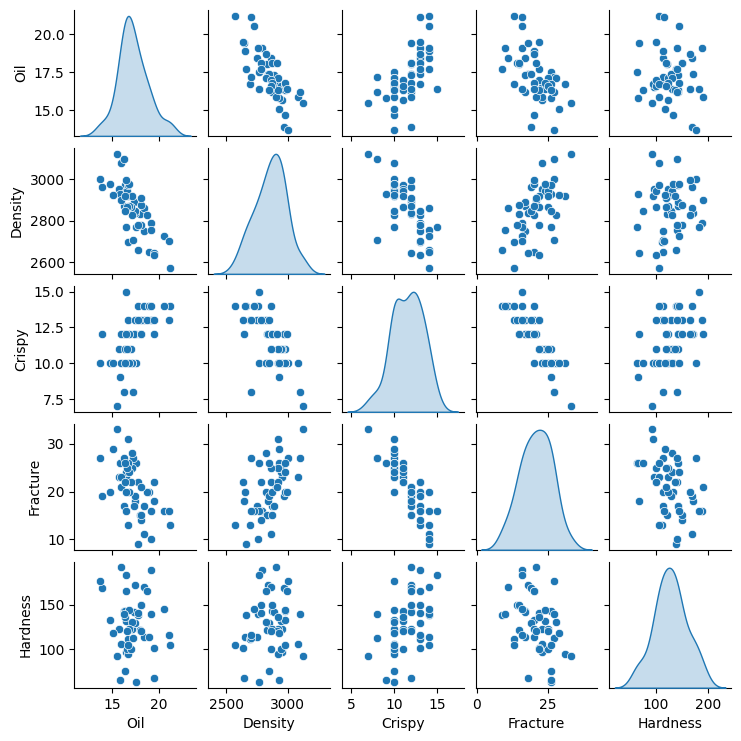

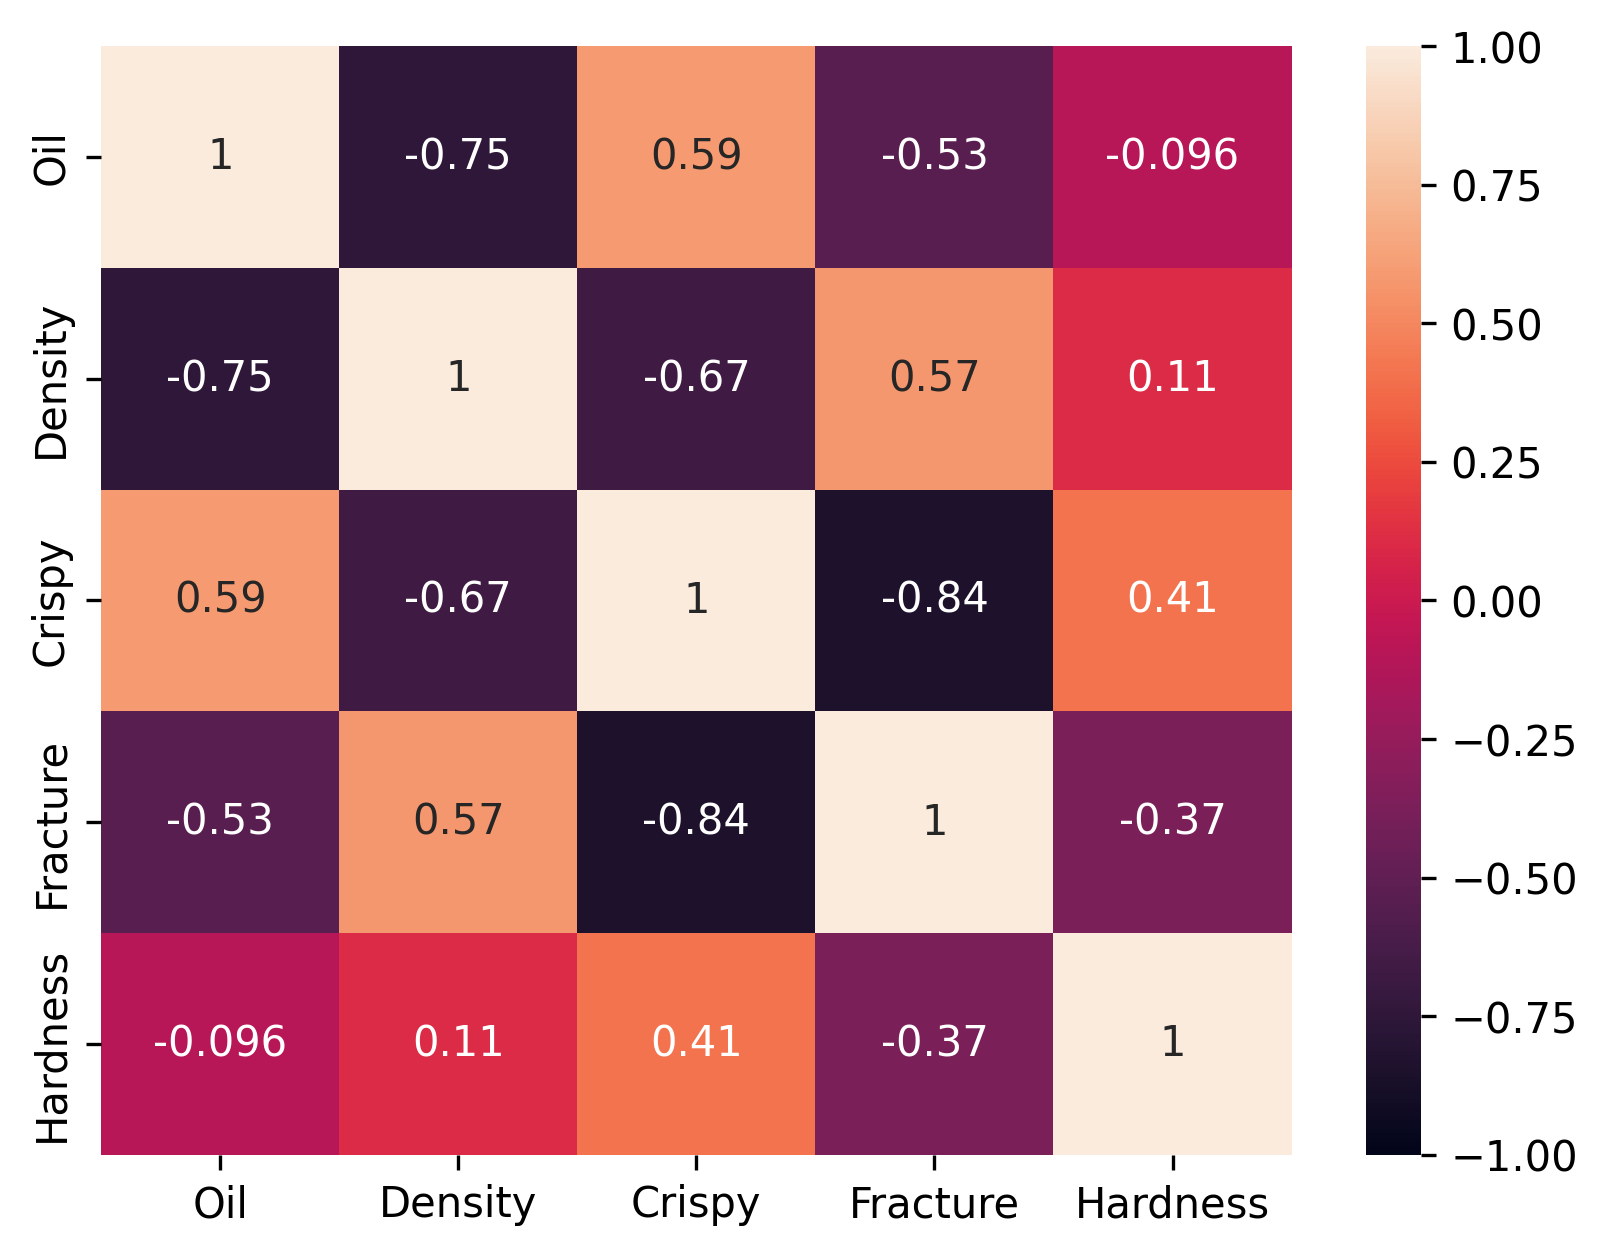

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.pairplot(food_df,
                 diag_kind="kde", size = 1.5)
a.savefig('a.pdf')
plt.show()
#
fig,ax = plt.subplots(dpi = 300)
sns.heatmap(food_df.corr(),
            annot=True, ax = ax, vmin = -1, vmax = 1)
plt.show()

# Análisis de Componentes Principales (PCA)

El análisis PCA se encuentra en el centro de muchos de los análisis realizados hoy en día en ciencia de datos. Esto se debe a su utilidad a la hora de analizar sets de datos con una alta cantidad de variables.

Este tipo de análisis se encarga de disminuir la cantidad de dimensiones de los datos, representandolos en sus `componentes principales`, los cuales son combinaciones lineales de las variabels originales.

Para poder realizar esta transformación, se pueden realizar los calculos según lo explicado en clases, o utilizar paquetes como `scikit learn`.


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# En primera instancia realizamos la estandarizacion de las variables

food_standard = pd.DataFrame(StandardScaler().fit_transform(food_df),
                             columns=food_df.columns,
                             index = food_df.index)



n_comp = 5
pca = PCA(n_components=n_comp) # utilizamos 5 componentes principales
pca.fit(food_standard) # ajustamos al set de datos


Al ser el cálculo de cada PC un cálculo paramétrico es posible interpretar cada variable latente que está interpretando el componente principal.

In [9]:
# Extraemos cada componente
import numpy as np
import matplotlib.colors as mcolors


# pca.components_ es una matrix de componentes x variables originales
componentes = pca.components_
df_componentes = pd.DataFrame(
    componentes,
    columns = food_df.columns,
    index = [f'PC{i+1}' for i in range(n_comp)])
display(df_componentes)

,Oil,Density,Crispy,Fracture,Hardness
PC1,0.457533,-0.478745,0.532388,-0.504477,0.153403
PC2,-0.370439,0.356750,0.197661,-0.221240,0.804666
PC3,0.659030,0.016240,-0.178884,0.542279,0.489233
PC4,0.467945,0.718463,-0.132527,-0.456932,-0.196184
PC5,0.012041,0.356482,0.792421,0.440116,-0.226148


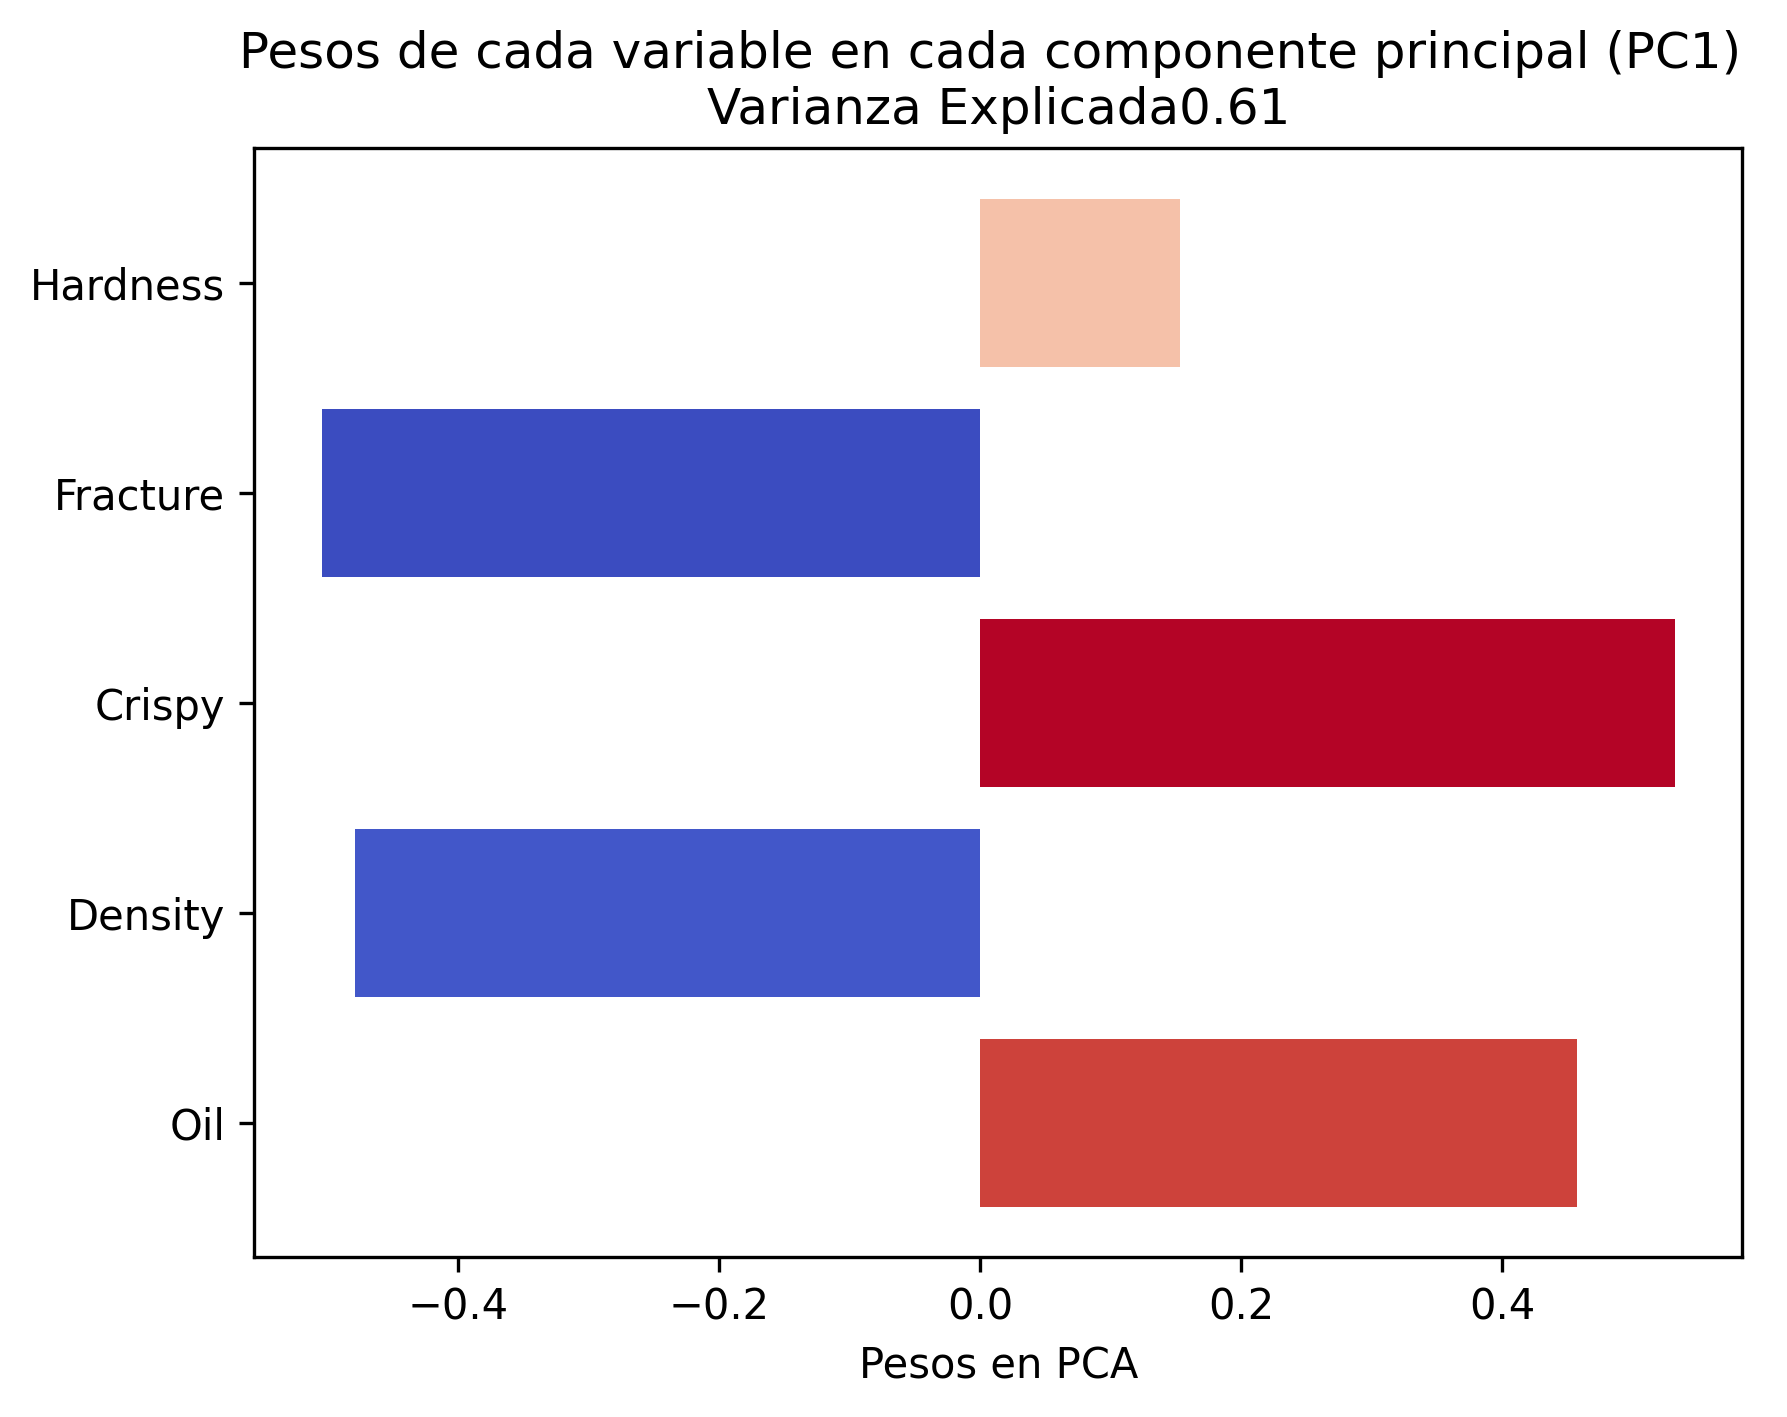

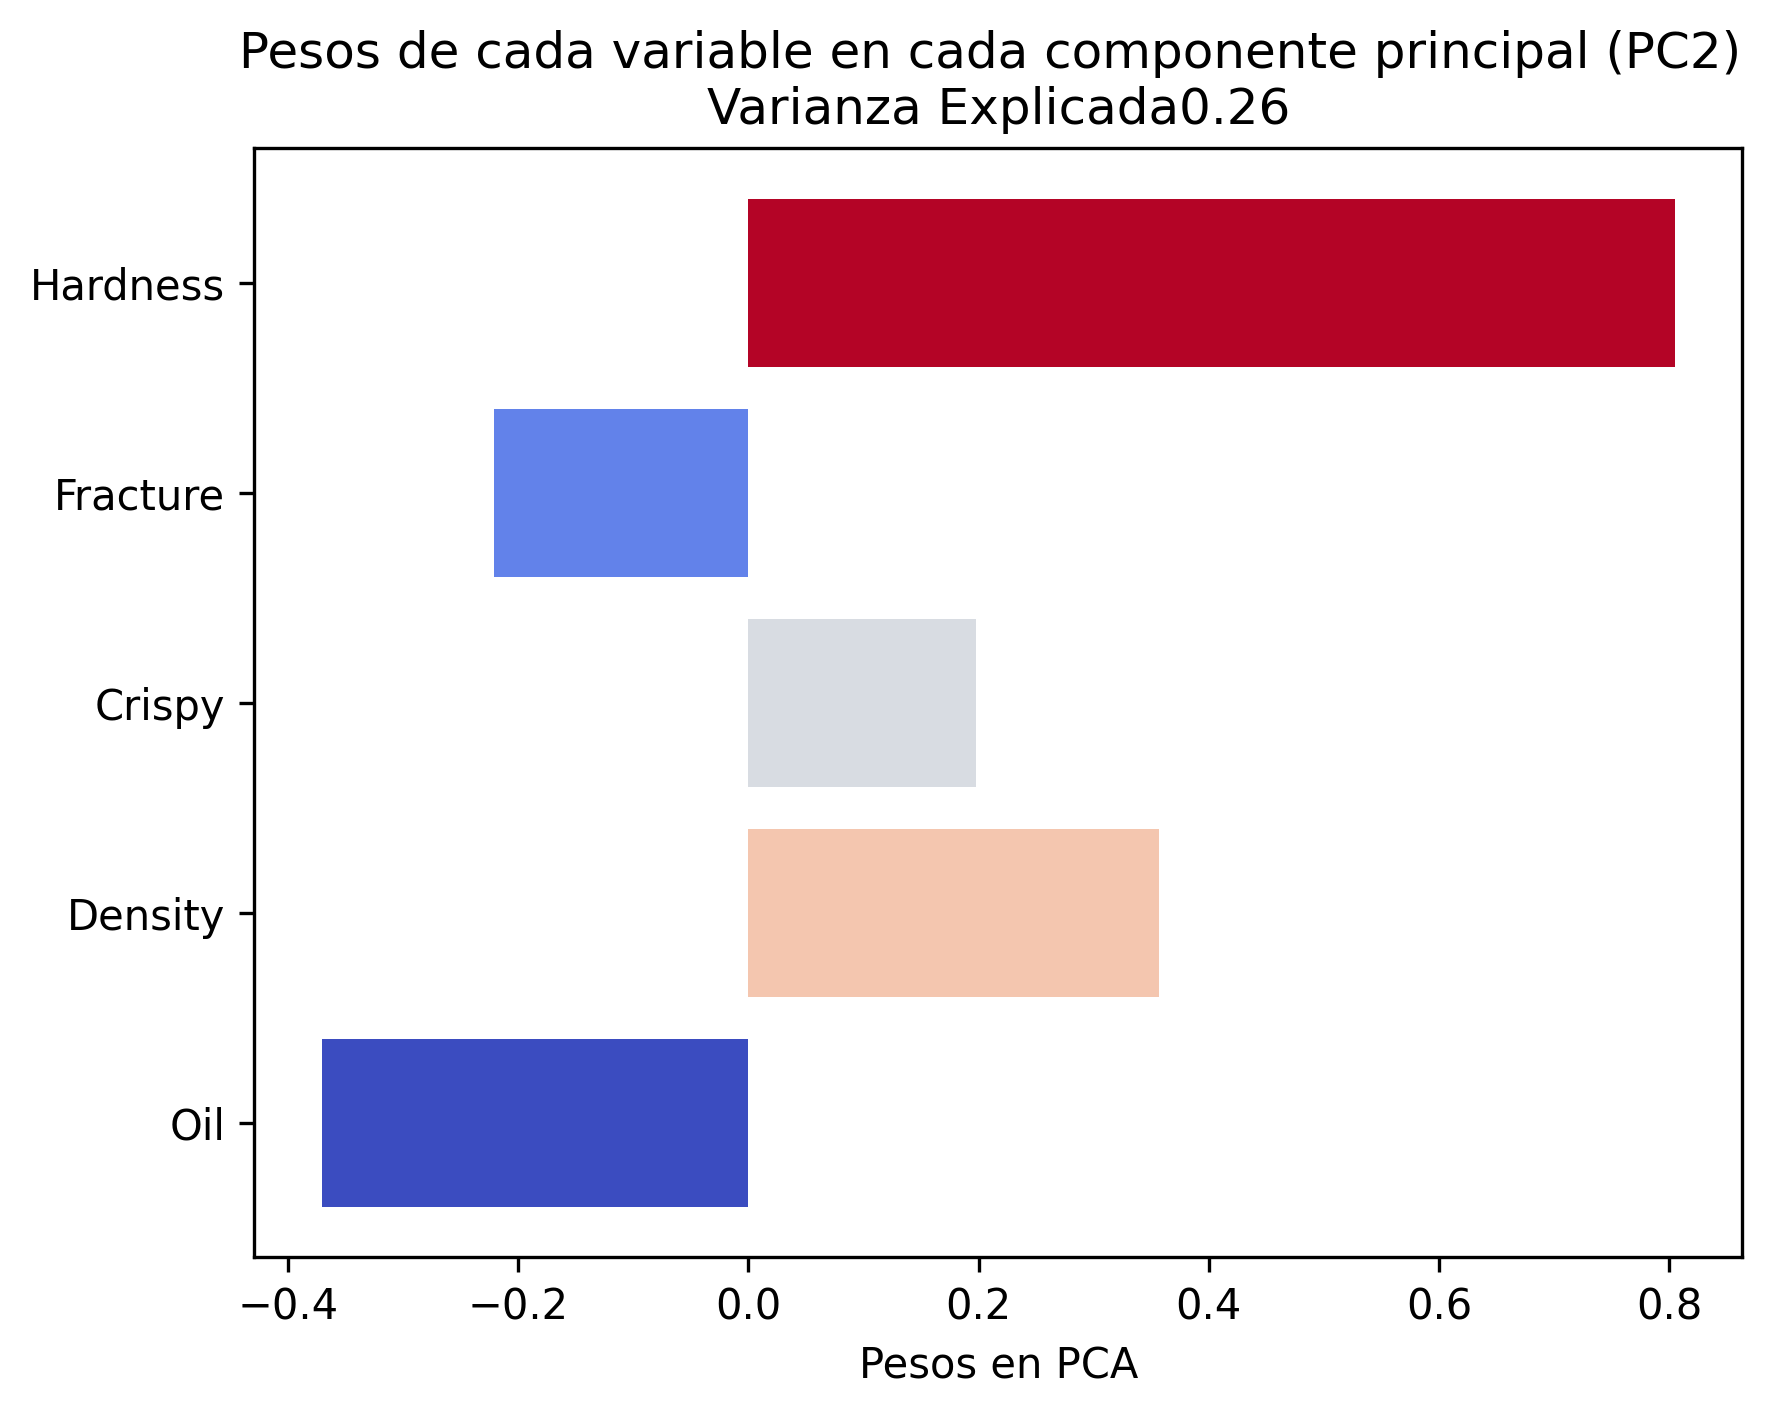

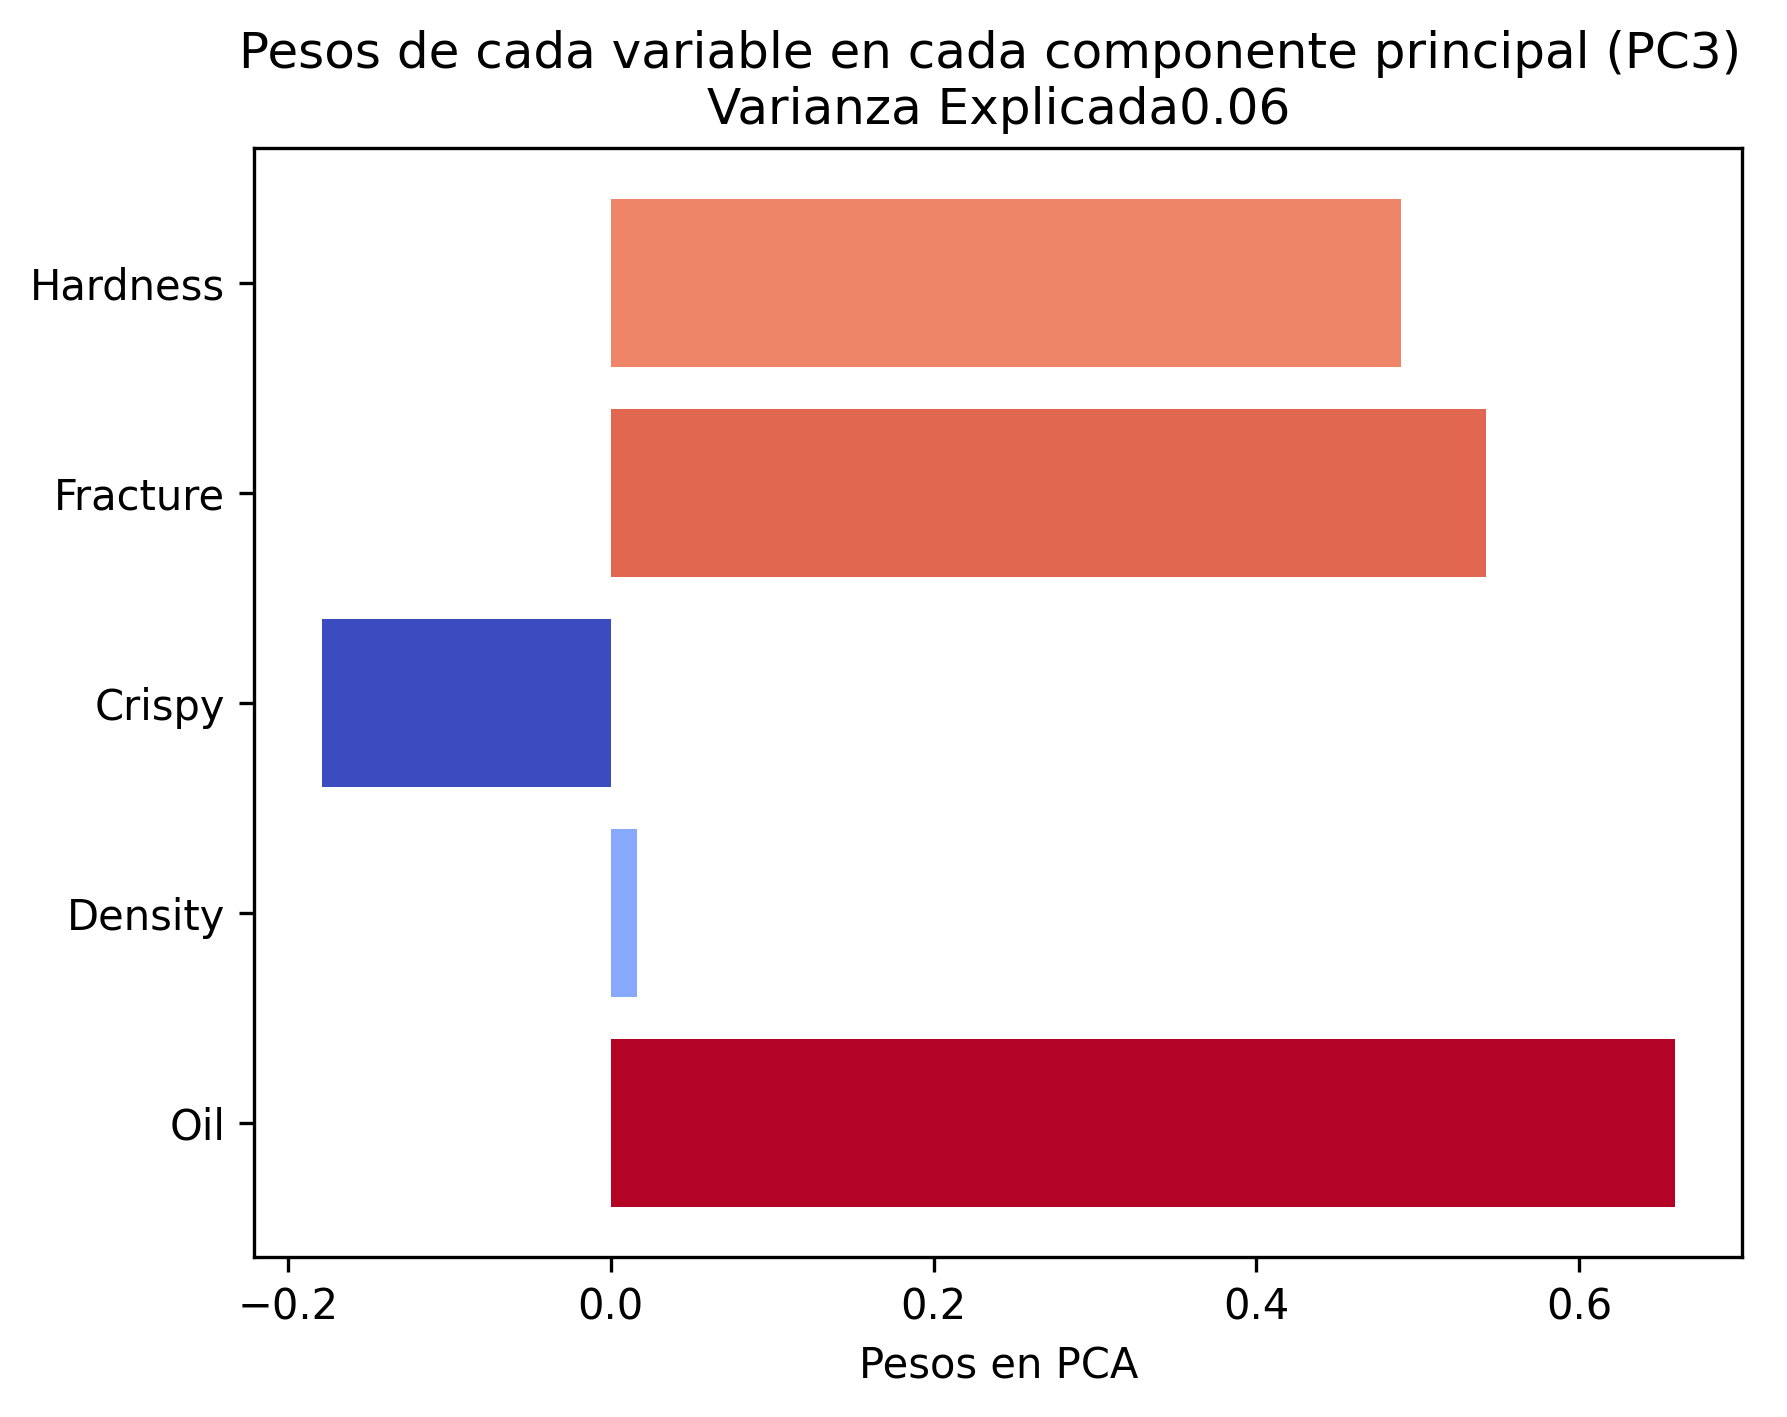

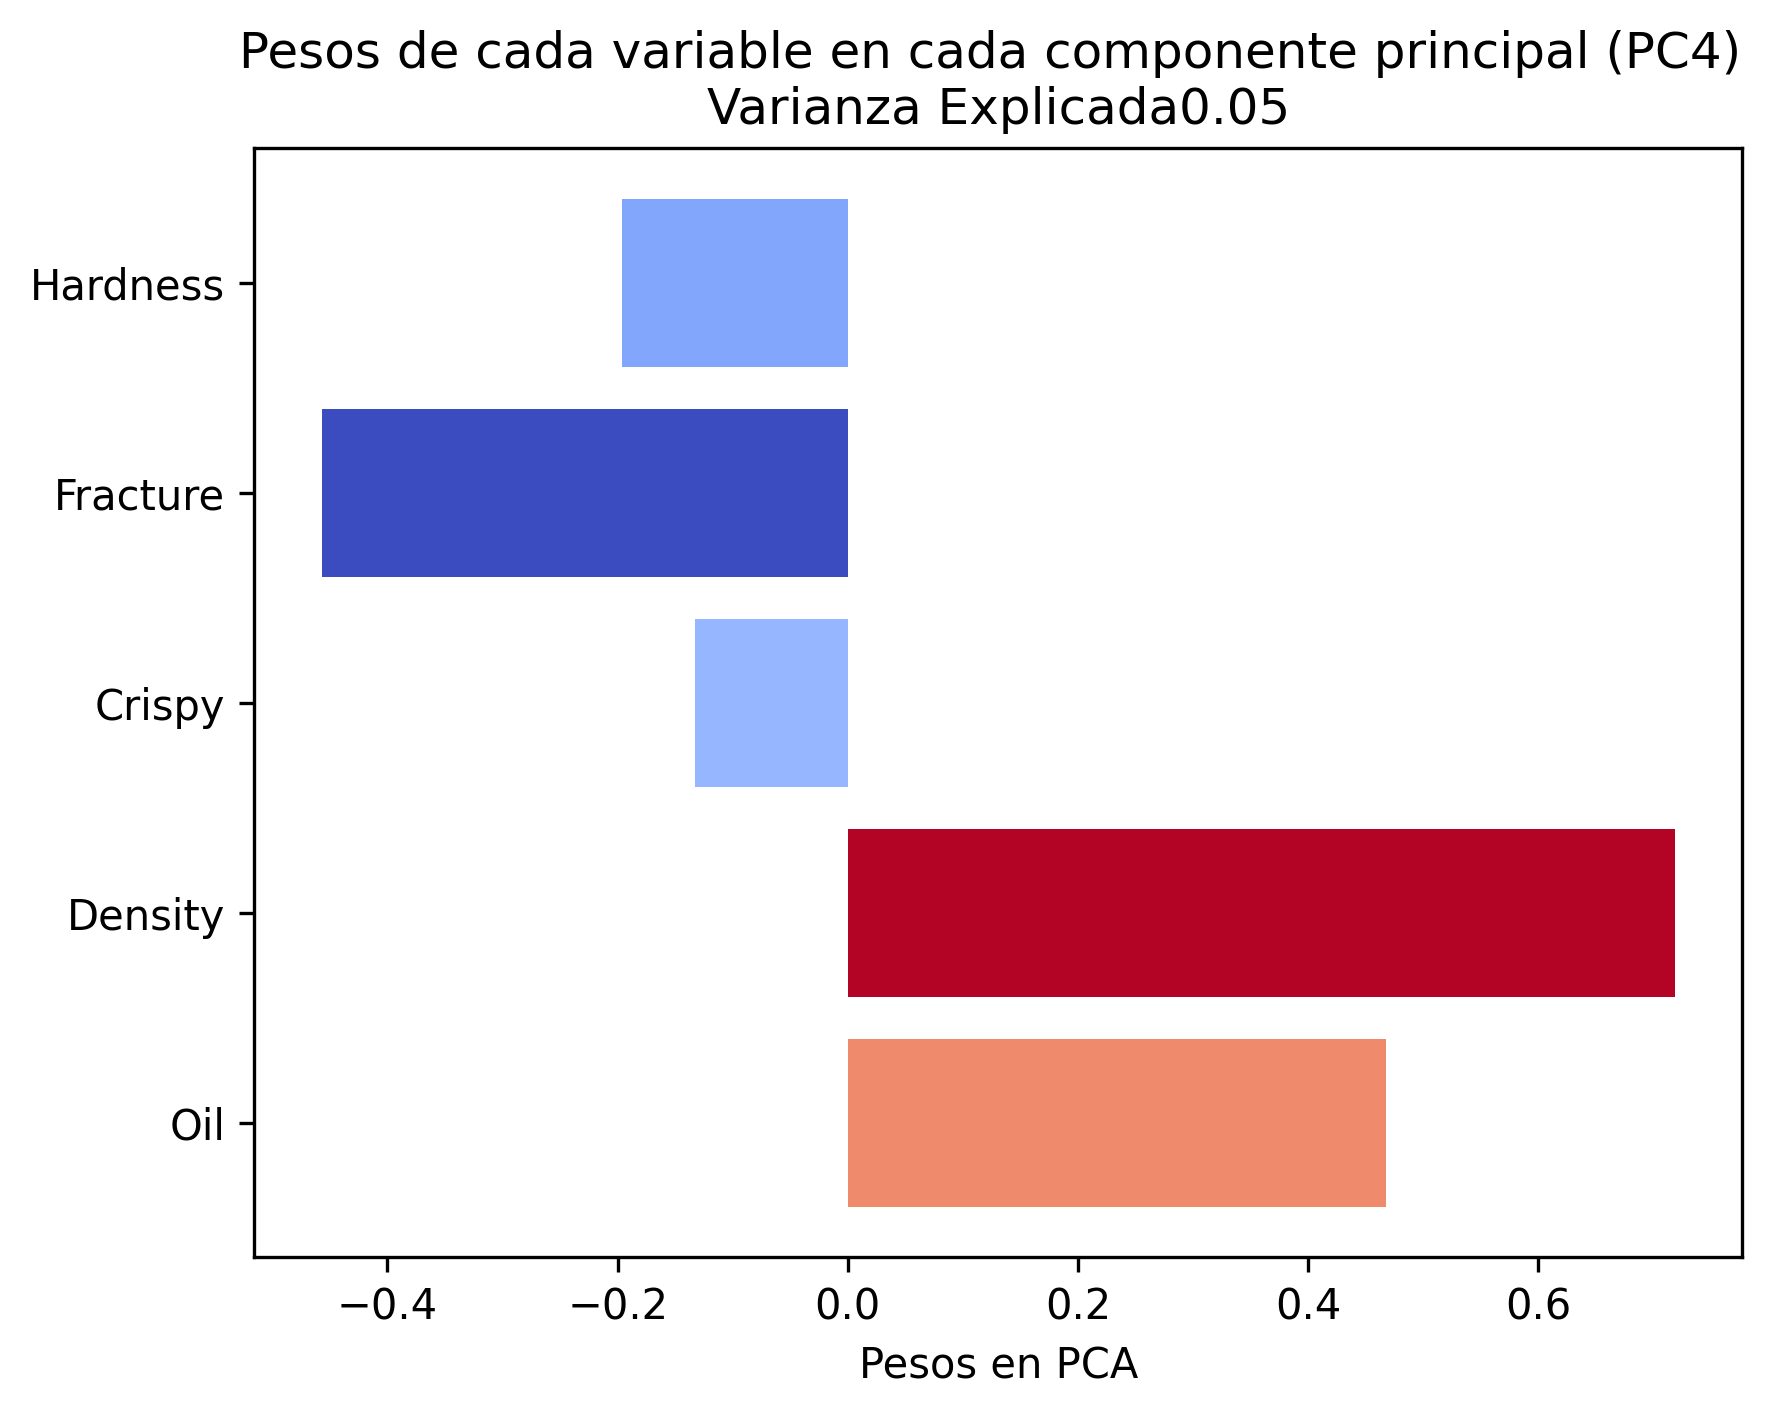

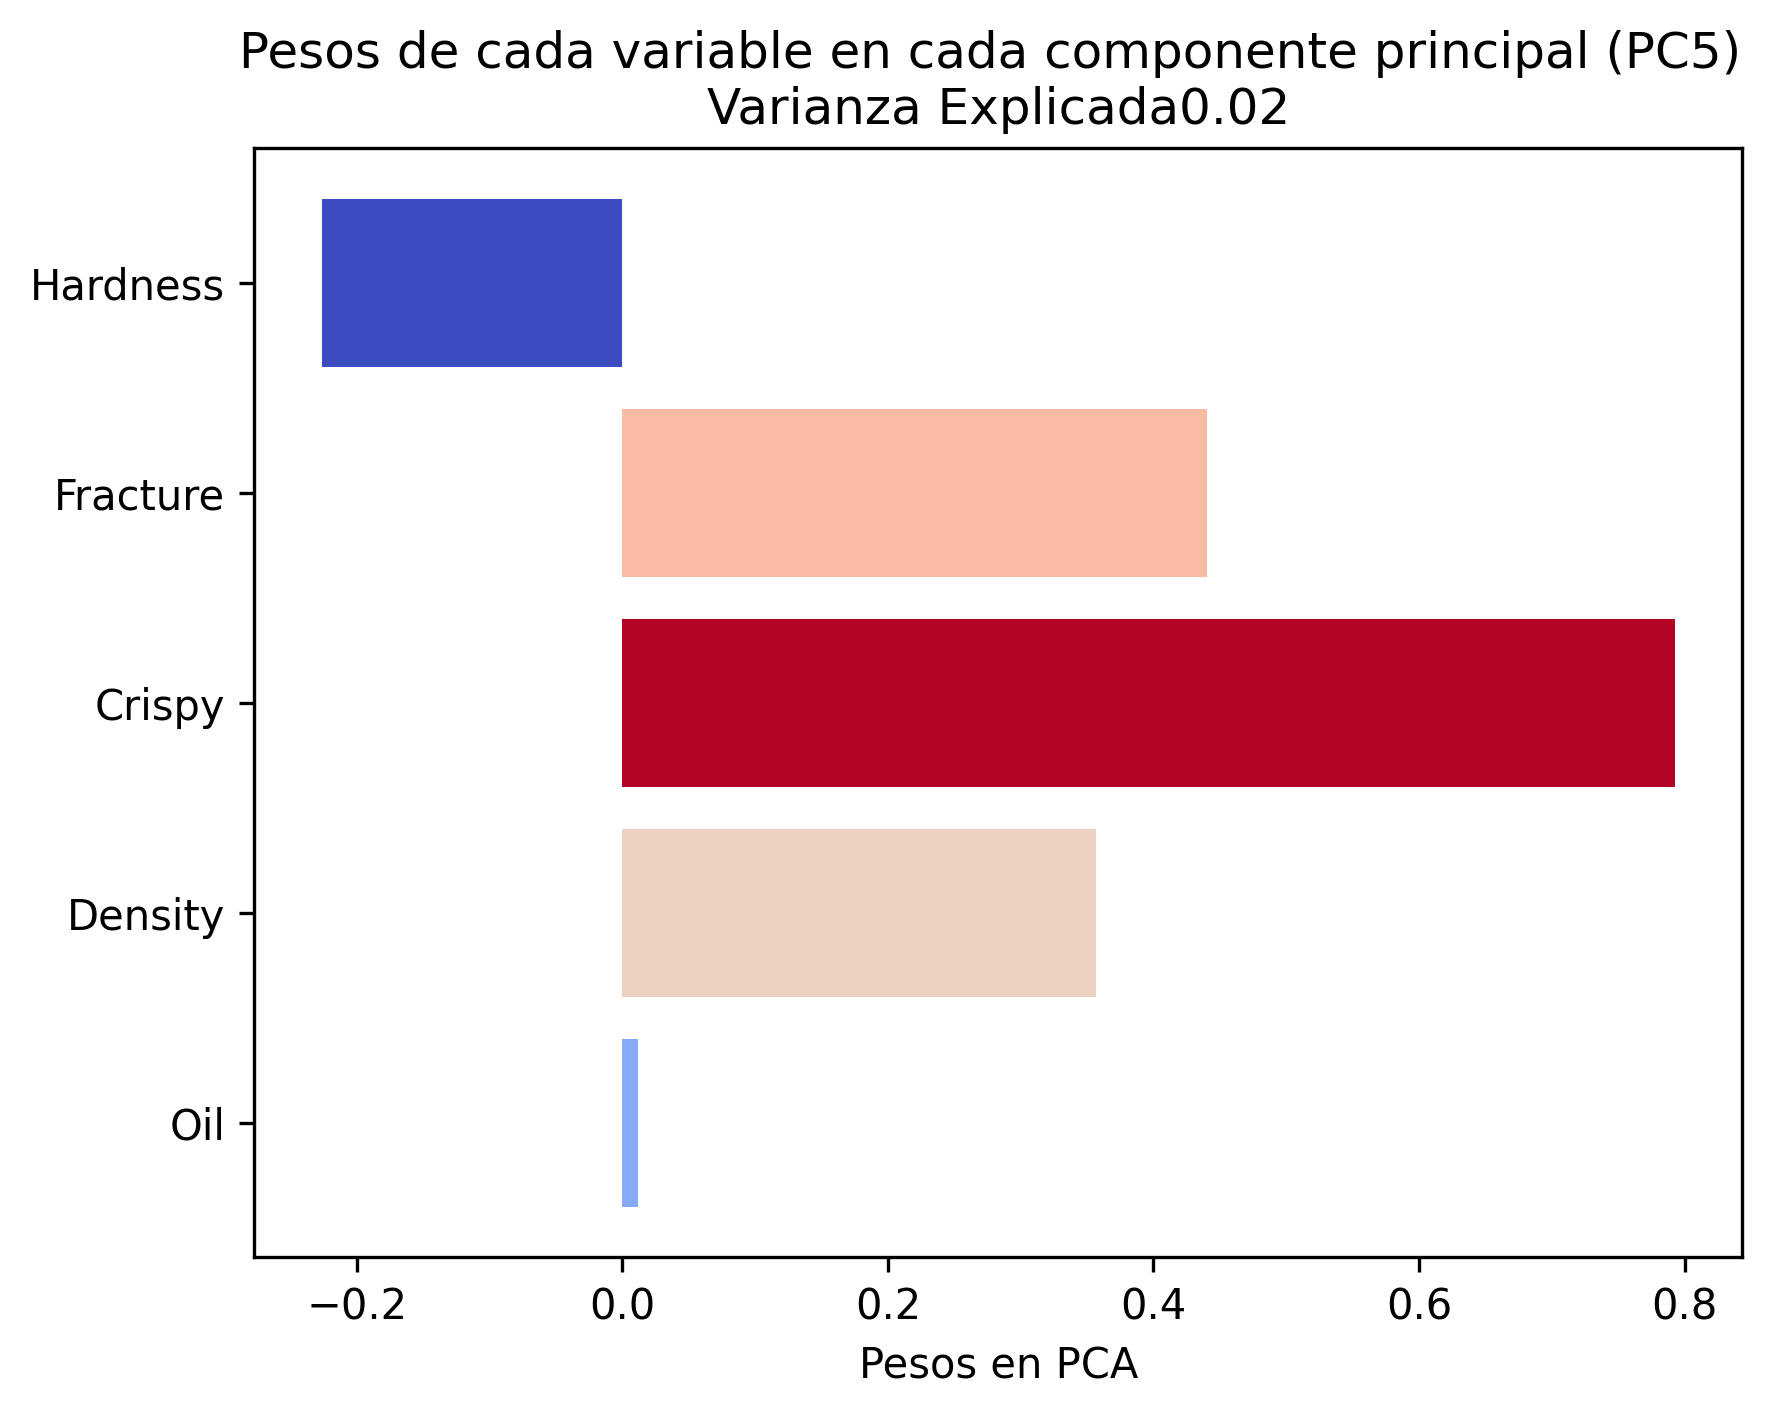

In [10]:

for i in range(componentes.shape[0]):
    fig, ax = plt.subplots(dpi = 300)
    color_n = mcolors.Normalize(vmin = componentes[i, :].min(), vmax = componentes[i, :].max())
    cmap = plt.cm.coolwarm
    for j in range(componentes.shape[1]):
        ax.barh(j, componentes[i, j], color = cmap(color_n(componentes[i, j])))
    # ax.set_xticks(np.arange(componentes.shape[1]))
    ax.set_yticks(np.arange(componentes.shape[1]))
    ax.set_yticklabels(food_df.columns)
    ax.set_xlabel('Pesos en PCA')
    exp_var = pca.explained_variance_ratio_[i]
    ax.set_title(f'Pesos de cada variable en cada componente principal (PC{i+1}) \nVarianza Explicada{exp_var:.2f}')

plt.show()


Y podemos extraer cuanto contribuye cada variable a cada componente principal.

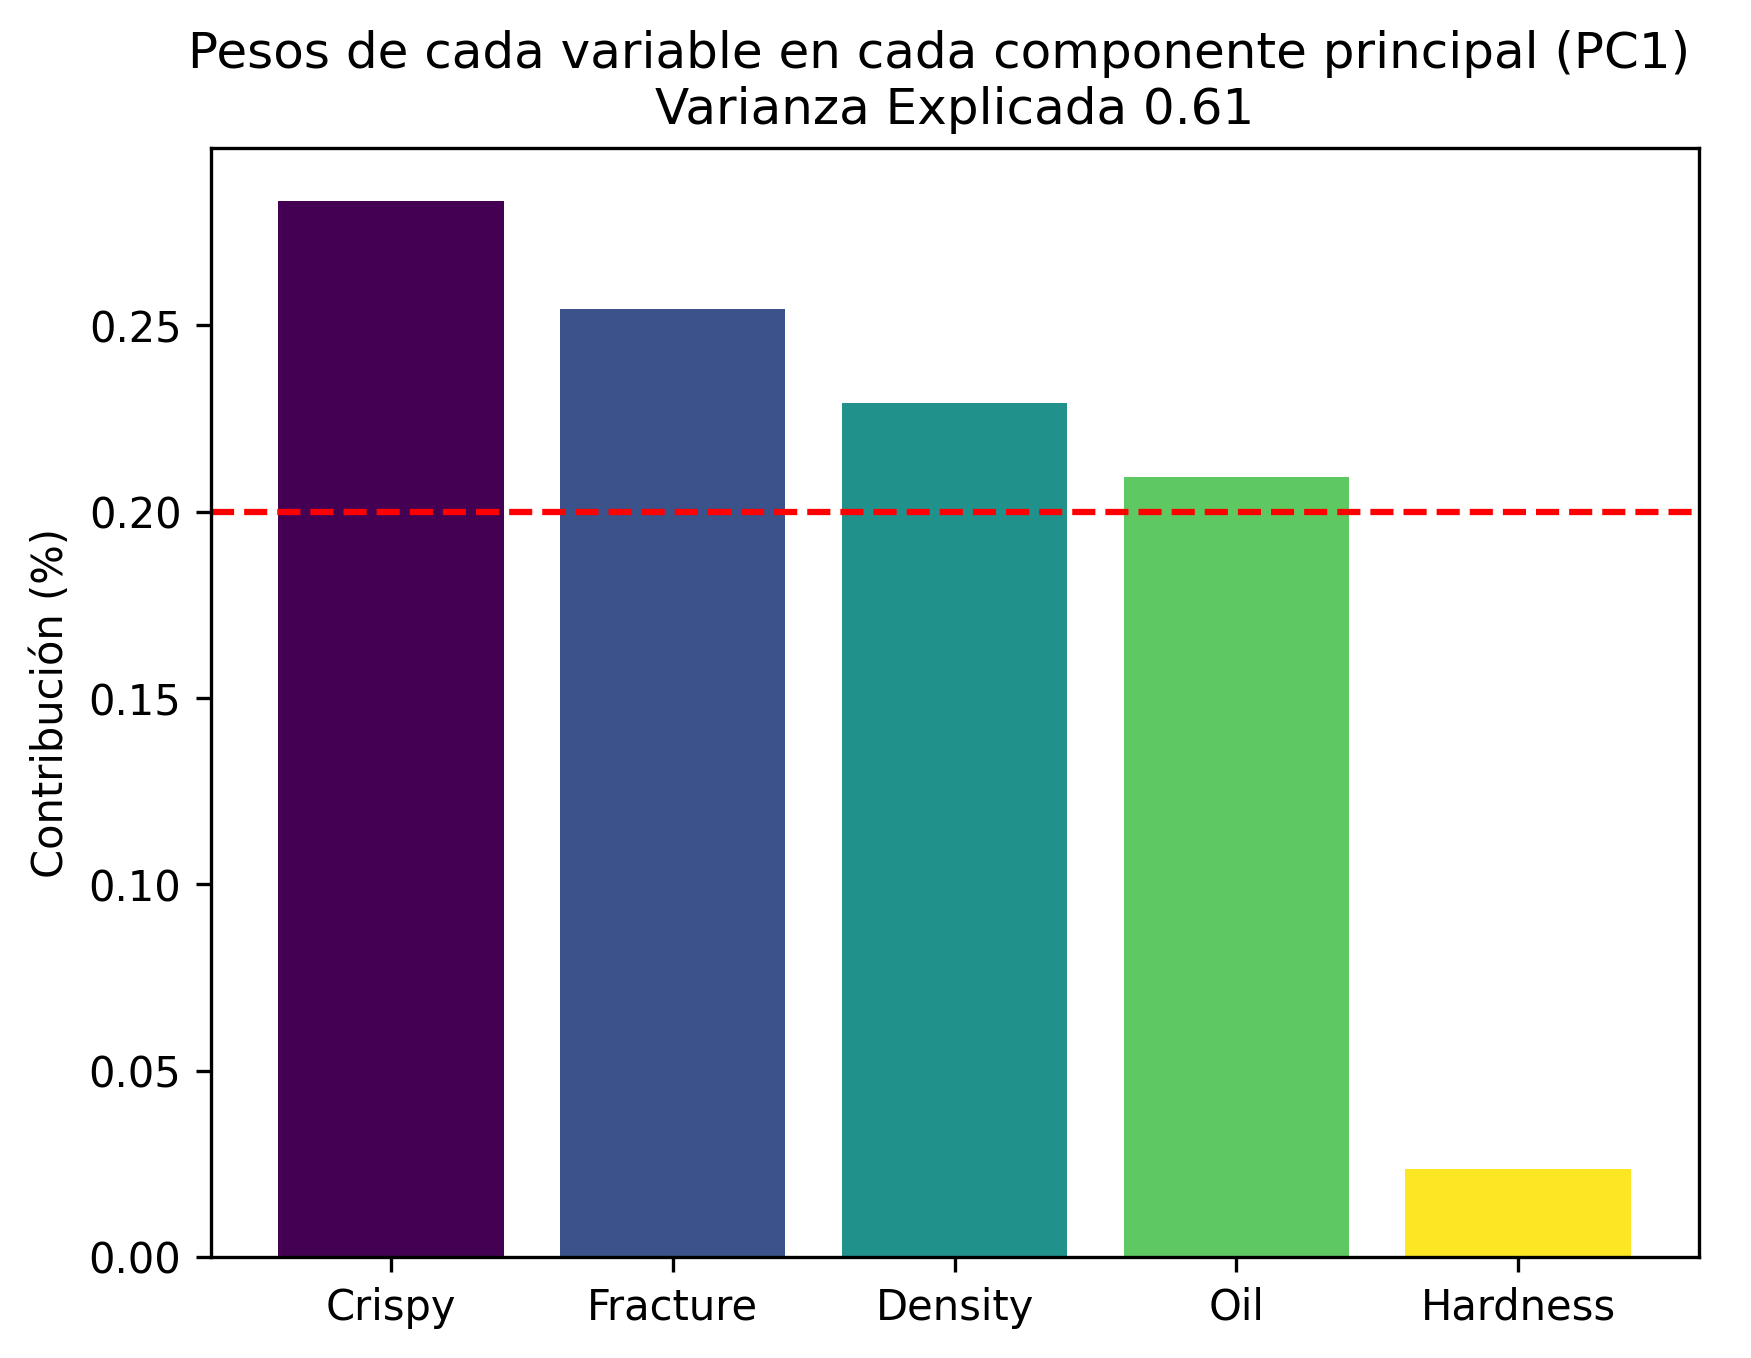

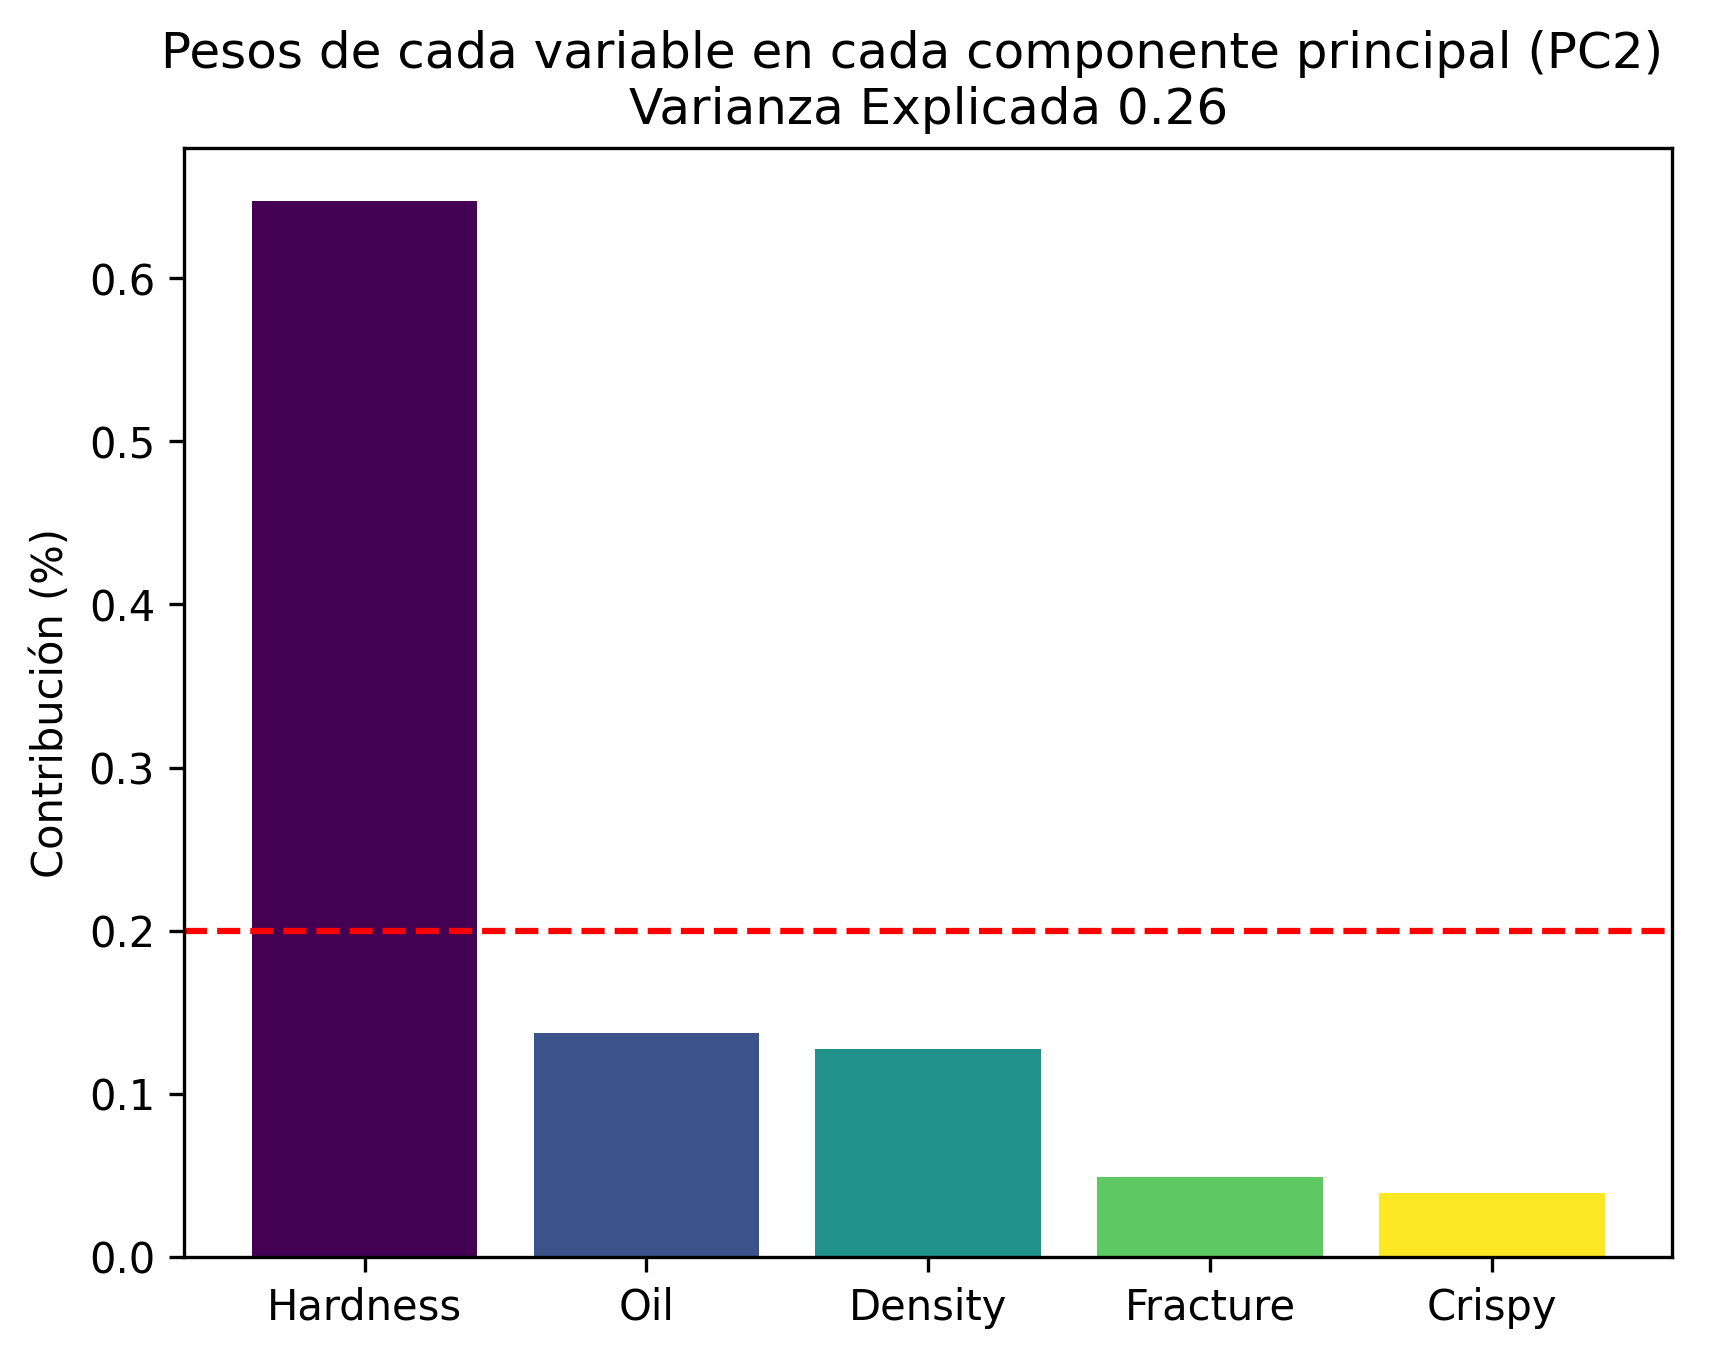

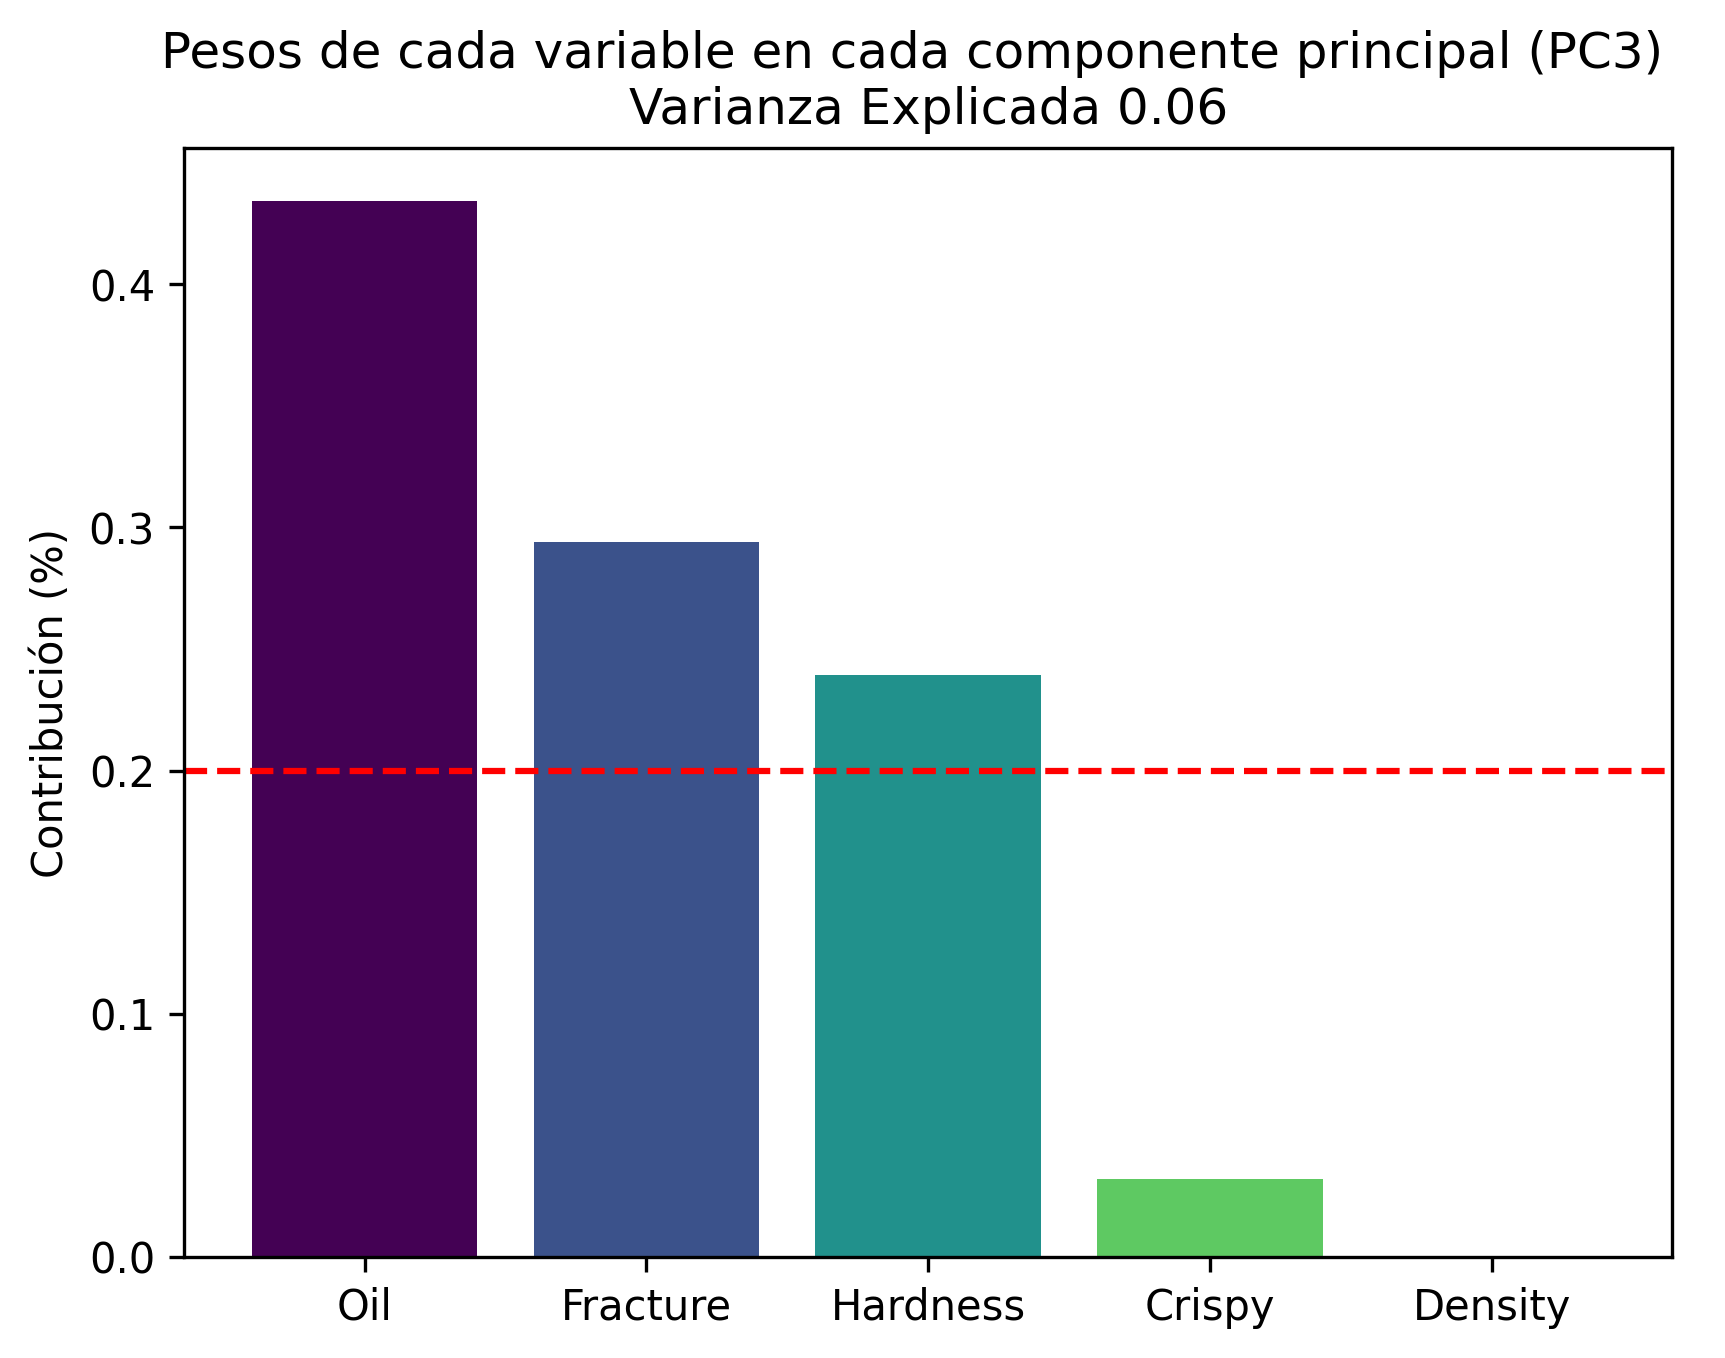

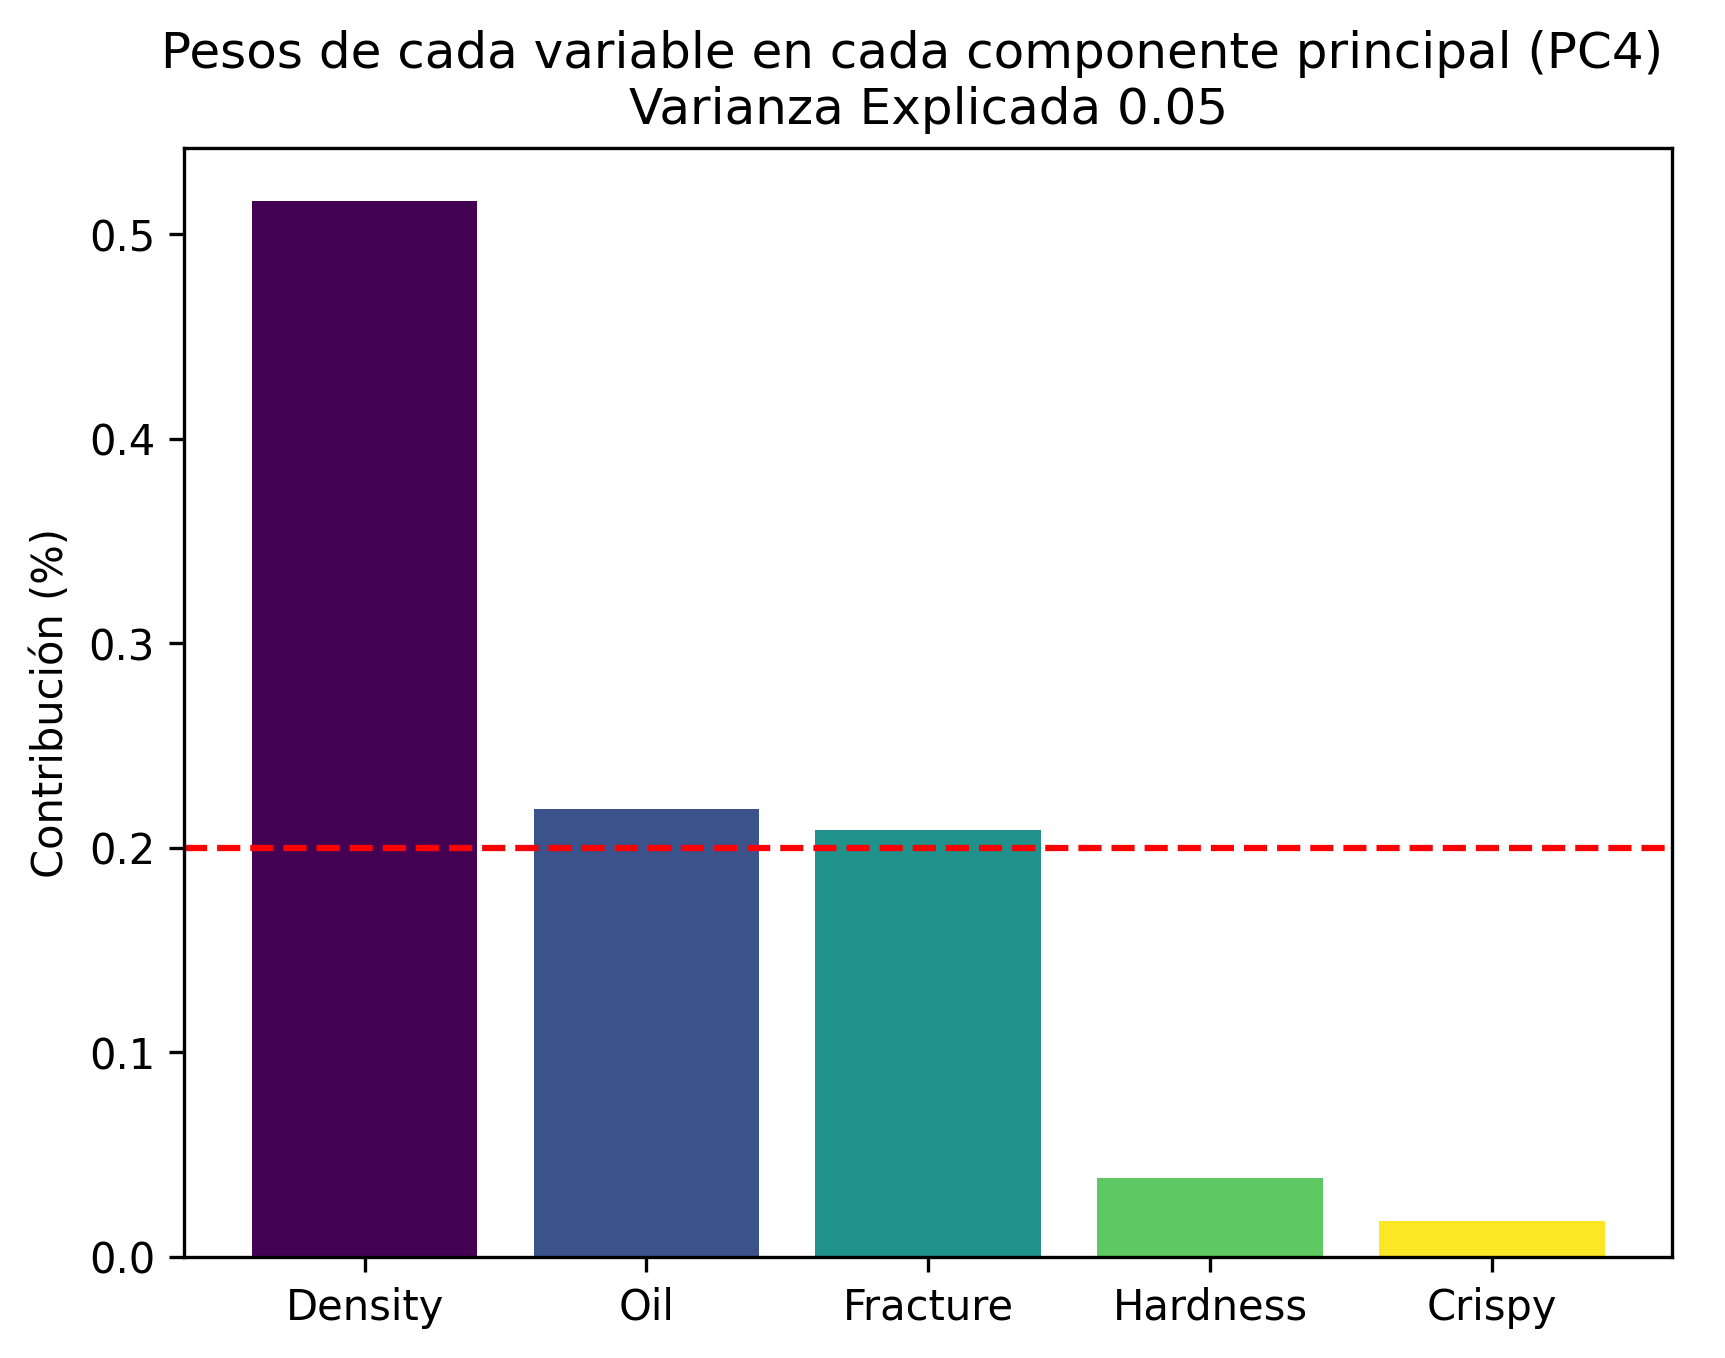

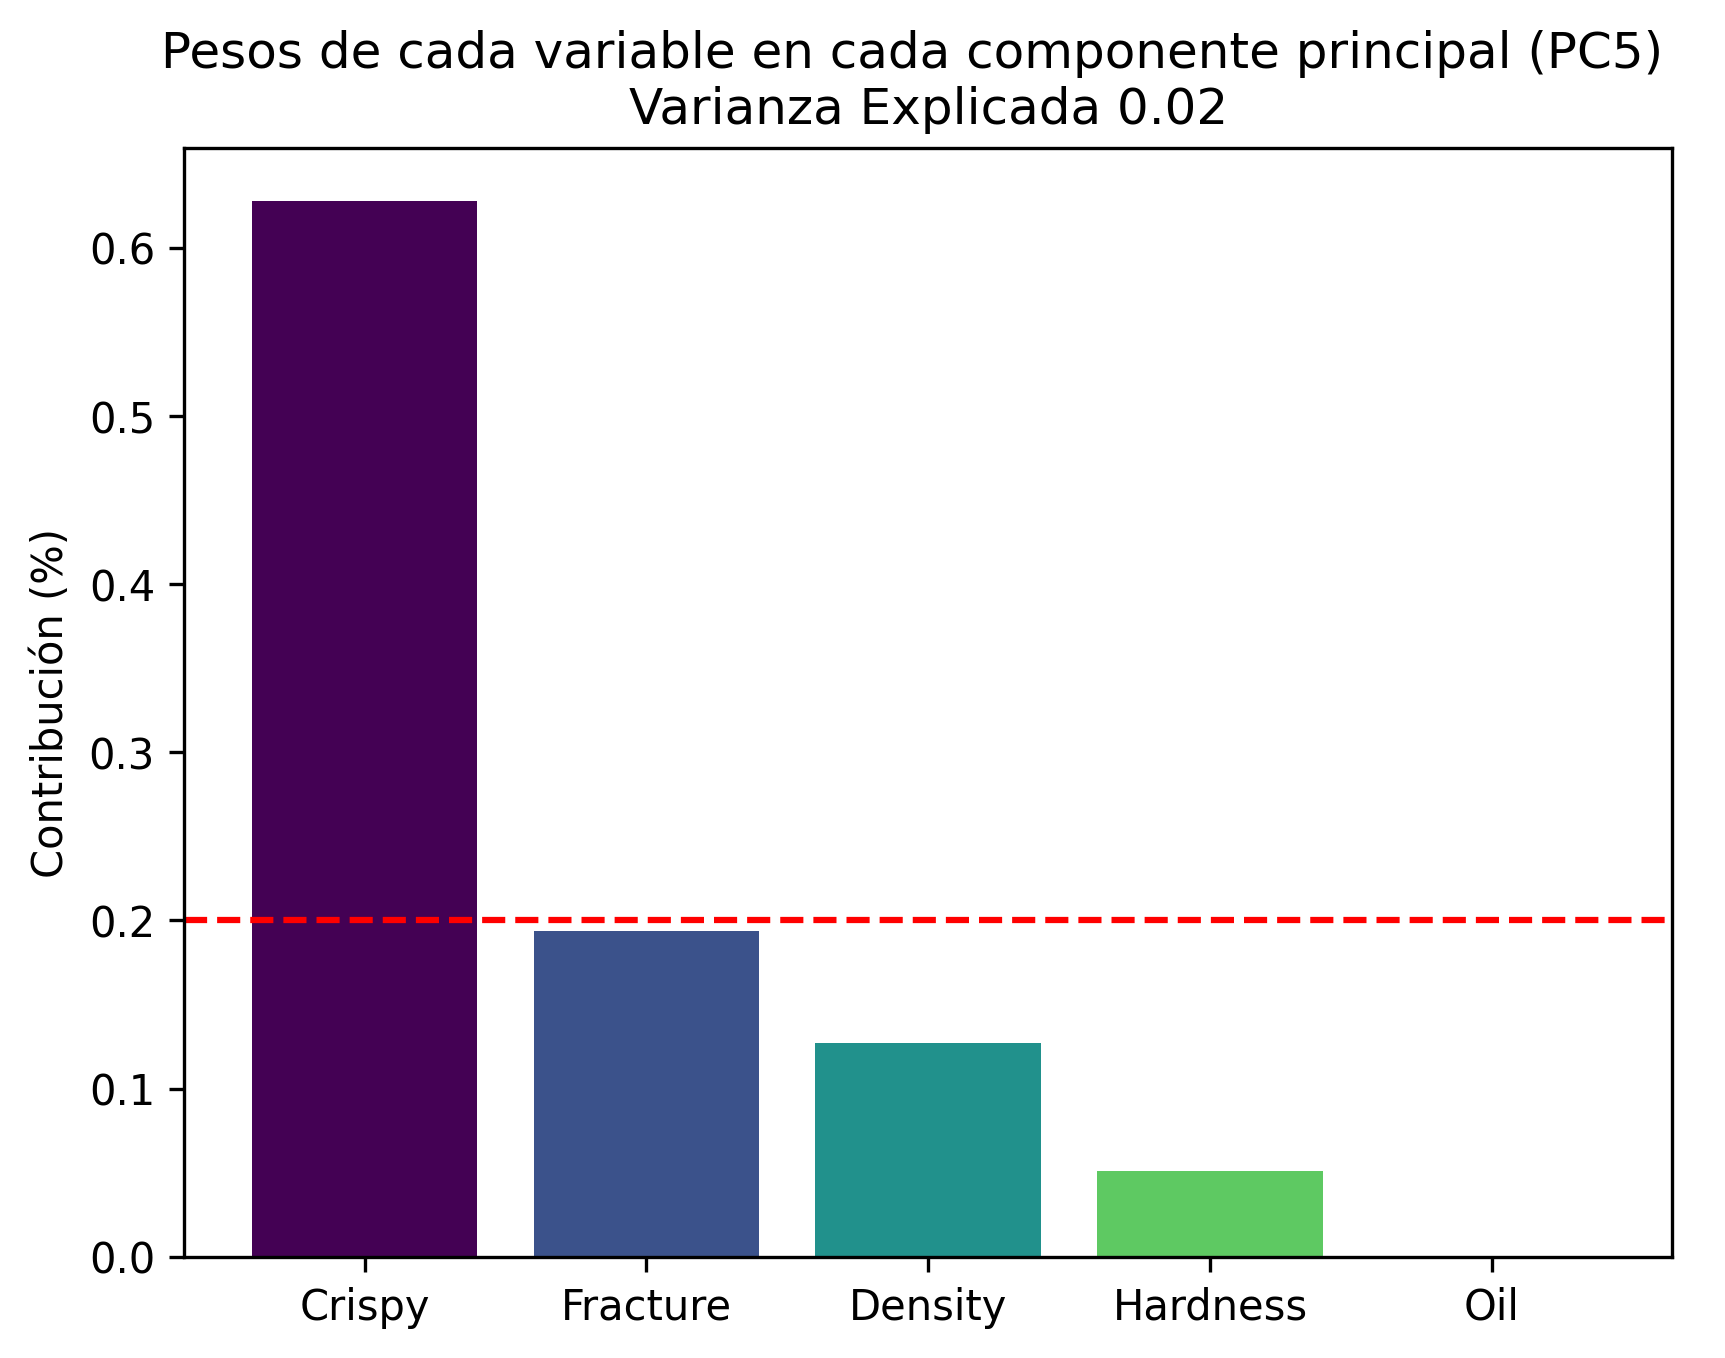

In [18]:
# pca.components_ es una matrix de componentes x variables originales
componentes = pca.components_
colors = plt.colormaps['viridis'](np.linspace(0, 1, componentes.shape[0]))
for i in range(componentes.shape[0]):
    comp2 = np.square(componentes[i, :])
    porcentage = comp2/np.sum(comp2)
    df_perc = pd.DataFrame(columns = ['variable', 'percentage'])
    fig, ax = plt.subplots(dpi = 300)
    df_perc['variable'] = food_df.columns
    df_perc['percentage'] = porcentage
    df_perc = df_perc.sort_values(by = 'percentage', ascending = False)
    ax.bar(np.arange(componentes.shape[1]), df_perc['percentage'], color = colors)
    ax.set_xticks(np.arange(componentes.shape[1]))
    ax.set_xticklabels(df_perc['variable'])
    ax.set_ylabel('Contribución (%)')
    exp_var = pca.explained_variance_ratio_[i]
    ax.axhline(y=0.2, color='r', linestyle='--')
    ax.set_title(f'Pesos de cada variable en cada componente principal (PC{i+1})  \nVarianza Explicada {exp_var:.2f}')

    plt.show()

Con esto dado, podemos utilizar la interfaz de sklearn para realizar el embedding de los datos:

In [23]:


n_comp = 5
pca = PCA(n_components=n_comp) # utilizamos 5 componentes principales
pca.fit(food_standard) # ajustamos al set de datos
food_pca = pd.DataFrame(pca.transform(food_standard),
                        columns = [f'PC{i+1}' for i in range(n_comp)],
                        index = food_standard.index)

display(food_pca.head())
display(food_standard.head())
# Ahora podemos evaluar cuanta varianza explica cada variable

,PC1,PC2,PC3,PC4,PC5
B110,-1.397254,-0.625695,-0.406598,0.491750,-0.006009
B136,2.822848,0.357316,-1.086951,-0.258398,-0.493736
B171,0.239968,0.870204,-0.617757,-0.029822,-0.178113
B192,-1.959030,-1.153328,0.442393,-0.315704,0.559647
B225,-1.280810,0.670200,0.441604,-0.072634,0.407546


,Oil,Density,Crispy,Fracture,Hardness
B110,-0.445430,0.790272,-0.864754,0.395481,-1.011854
B136,0.315989,-1.603262,1.410914,-2.191776,0.351131
B171,-0.635784,0.100610,0.273080,-0.713344,0.480939
B192,-0.318527,0.506293,-0.864754,1.873913,-1.076758
B225,-0.572333,0.952546,-0.295837,0.949893,0.480939


También, con el análsis de PCA es posible evaluar cual es el valor que más alto tiene la variable.

In [24]:
# Para el PC1
print('Alimento con PC1 más alto')
print(food_pca[
    food_pca['PC1'] == food_pca['PC1'].max()
    ].head())

print('---------------------------')
# Para el PC2
print('Alimento con PC2 más alto')
print(food_pca[
    food_pca['PC2'] == food_pca['PC2'].max()
    ].head())

Alimento con PC1 más alto
           PC1       PC2       PC3       PC4       PC5
B758  3.646357 -1.777253  0.225824  0.134863 -0.152442
---------------------------
Alimento con PC2 más alto
           PC1       PC2       PC3       PC4       PC5
B397 -0.853791  2.282967 -0.953796 -0.493359  0.050947


Es posible también analizar los vectores de los pesos de cada PC y los valores de cada uno de las muestras. Para esto, se puede realizar un Biplot.

En este caso utilizaremos la librería https://erdogant.github.io/pca/pages/html/index.html que lo tiene ya implementado.

---
Referencia:
- https://plotly.com/python/pca-visualization/
- https://erdogant.github.io/pca/pages/html/Algorithm.html



In [26]:
! pip install pca

In [28]:
from pca import pca
# Initialize
model = pca(normalize=True)

# Fit transform and include the column labels and row labels
results = model.fit_transform(food_standard)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[09-06-2025 19:56:54] [scatterd.scatterd] [INFO] Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(None,
 <Axes: title={'center': 'BiPlot PCA'}, xlabel='PC1 (60.6% expl.var)', ylabel='PC2 (25.9% expl.var)'>)

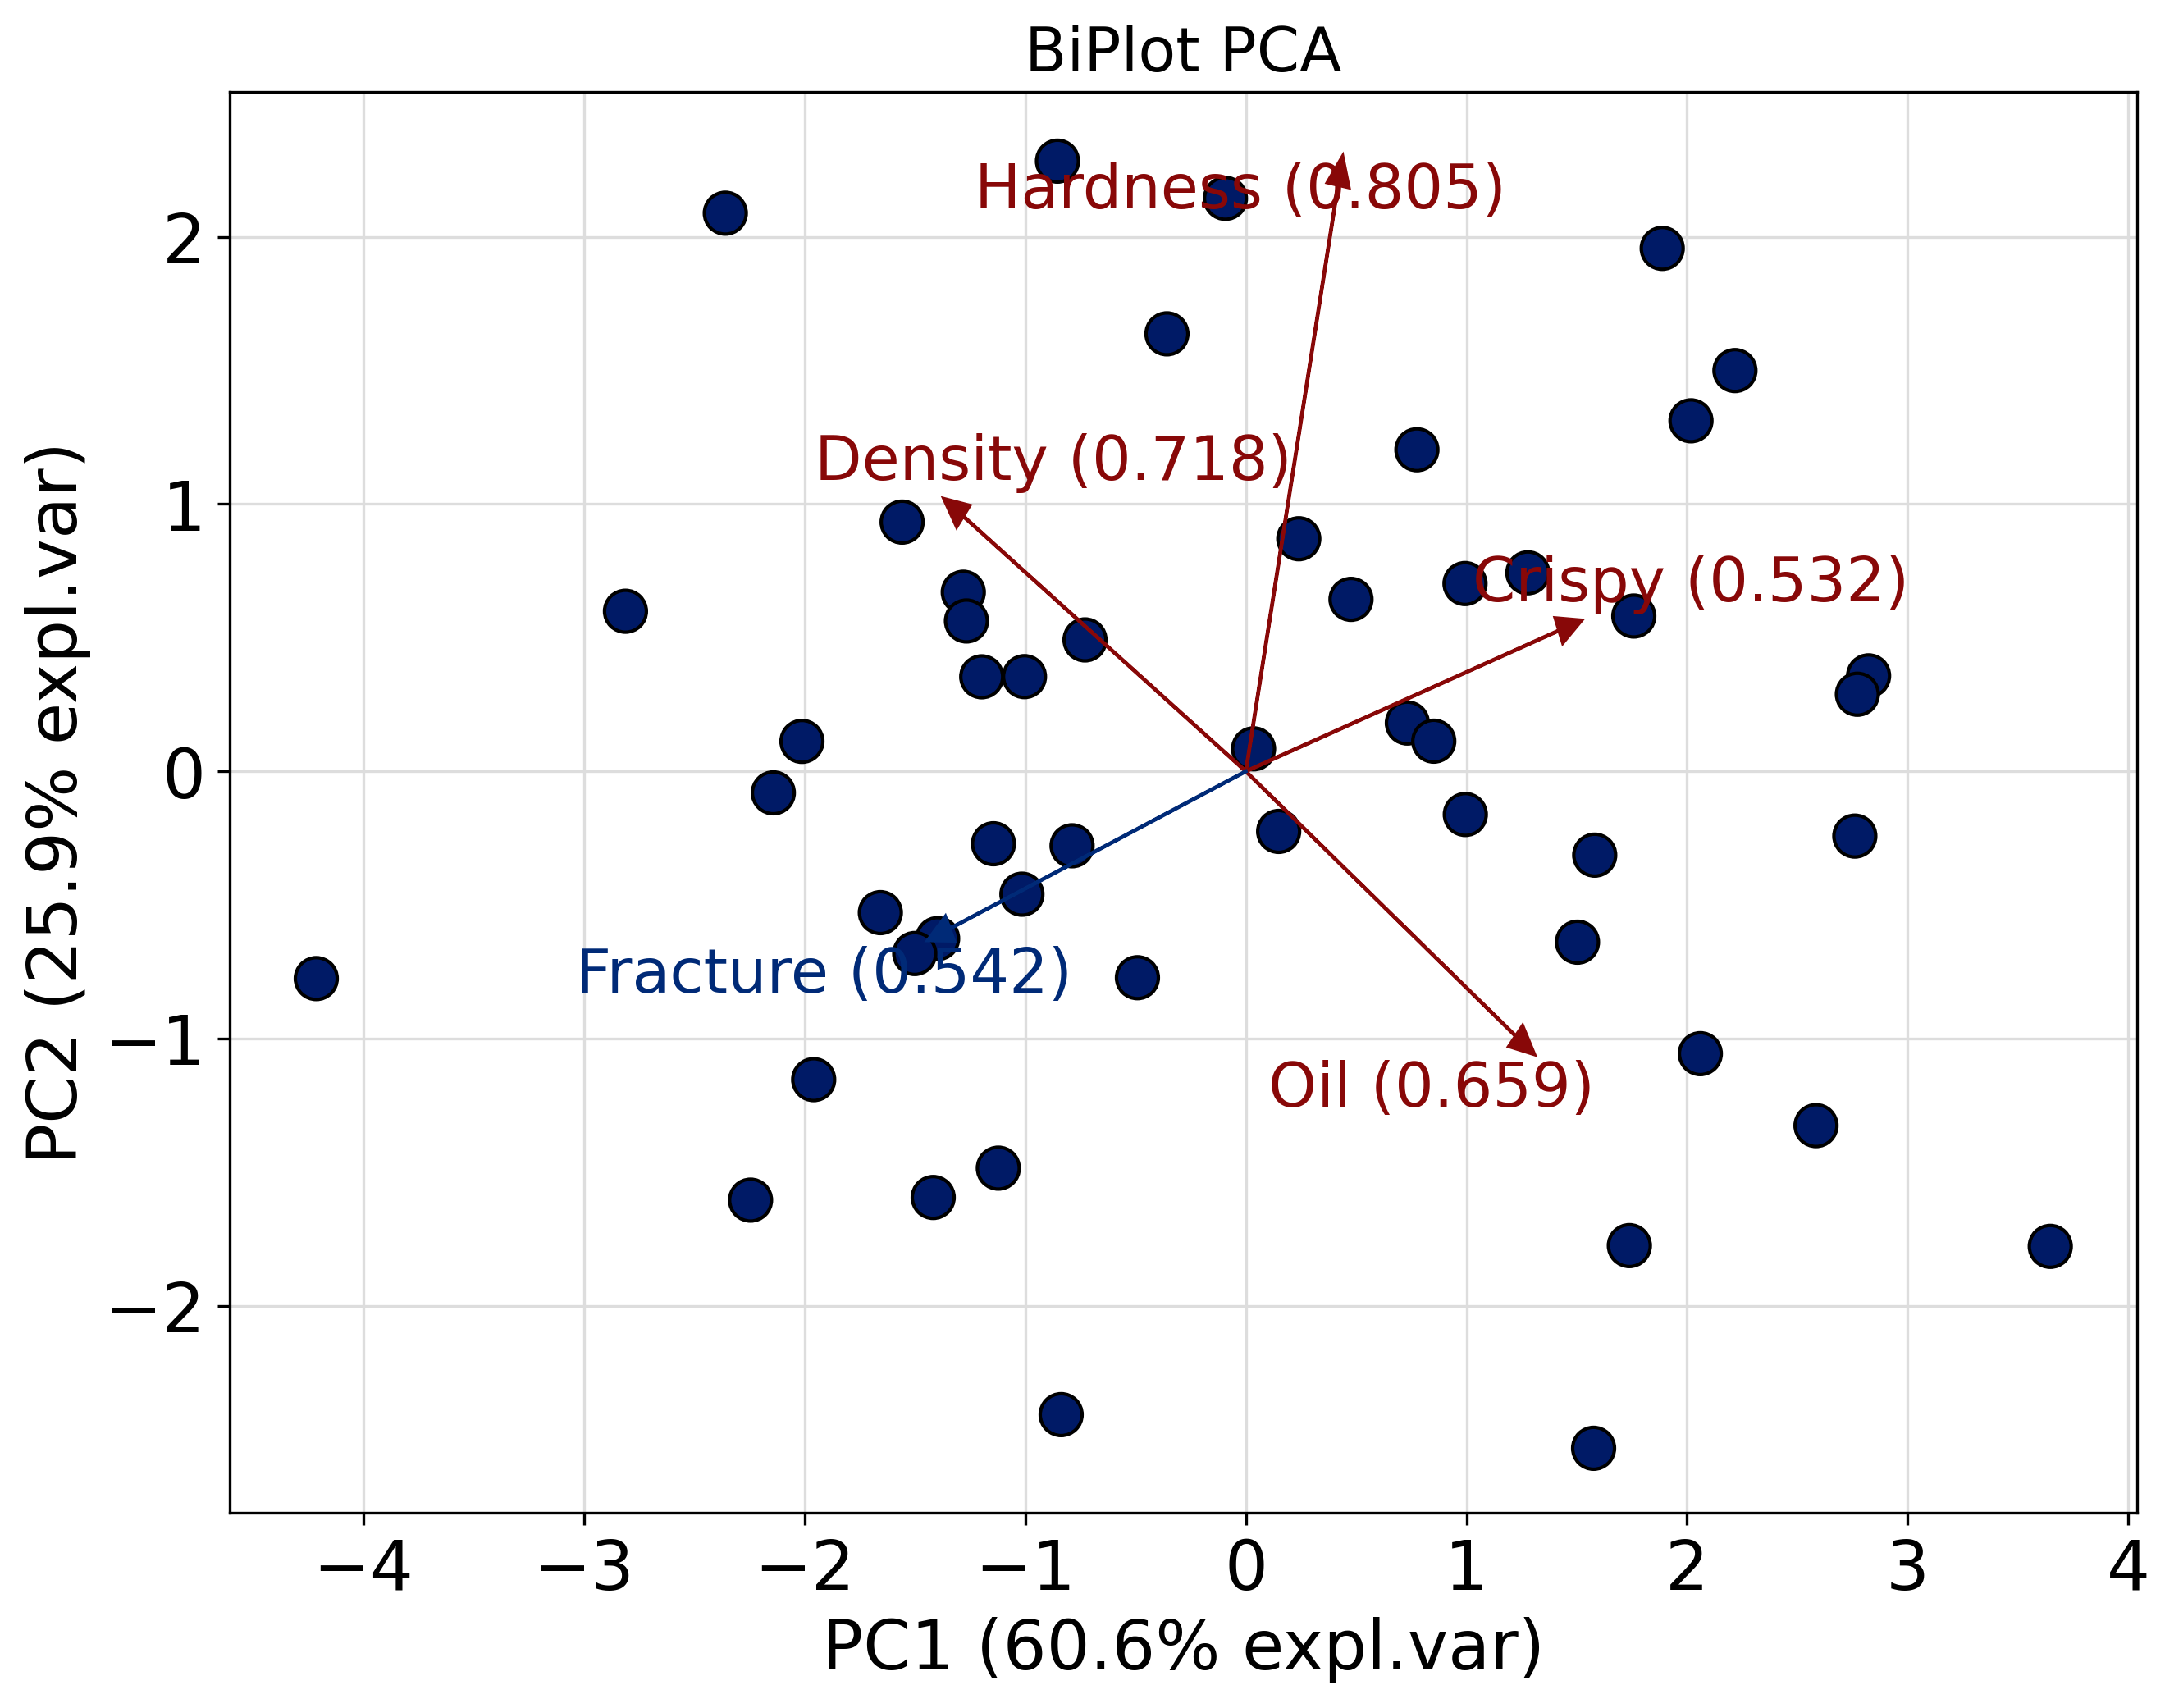

In [45]:
fig, ax = plt.subplots(dpi = 300, figsize = (10,7.5))
model.biplot(ax = ax, jitter = None,
             alpha = 1, title = 'BiPlot PCA' ,
             arrowdict={
                 'alpha':1
             })

[09-06-2025 19:57:55] [scatterd.scatterd] [INFO] Create scatterplot


[pca] >Plot PC1 vs PC3 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(None,
 <Axes: title={'center': 'BiPlot PCA'}, xlabel='PC1 (60.6% expl.var)', ylabel='PC3 (6.20% expl.var)'>)

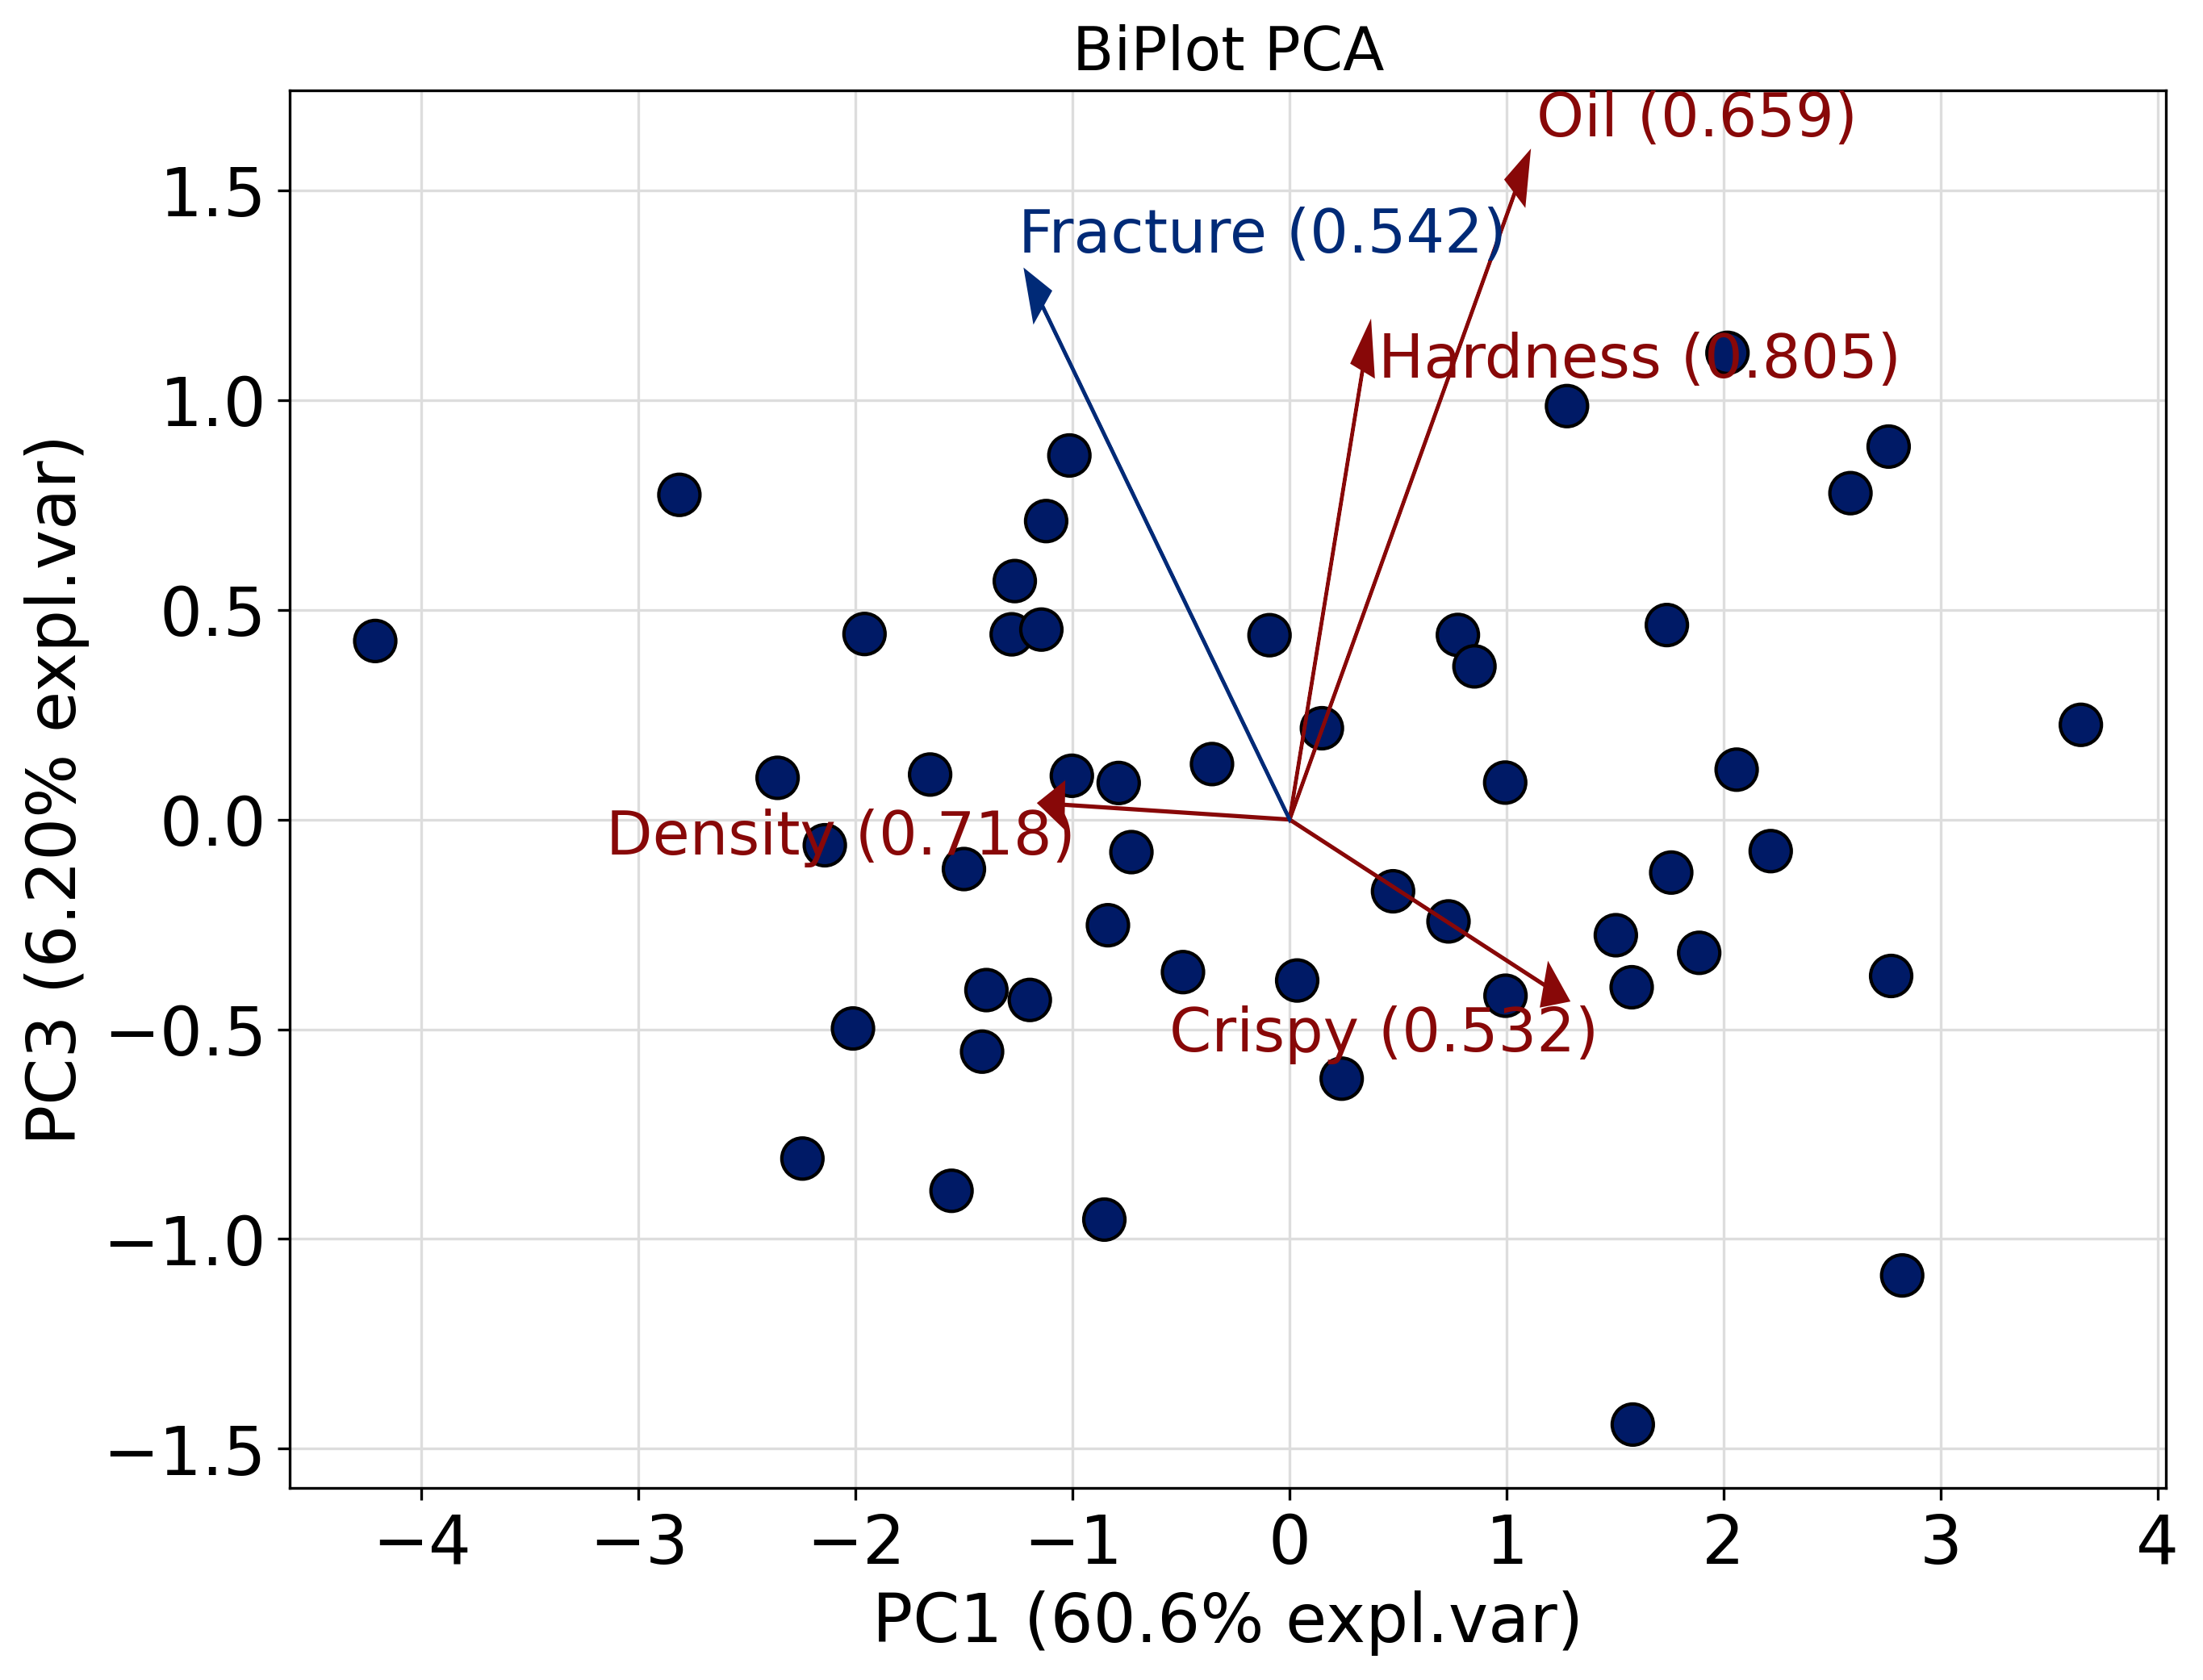

In [47]:
fig, ax = plt.subplots(dpi = 300, figsize = (10,7.5))
model.biplot(ax = ax, PC = [0,2],jitter = None,
             alpha = 1, title = 'BiPlot PCA' ,
             arrowdict={
                 'alpha':1
             })

A su vez, es posible evaluar la importancia de cada componente principal al evaluar cuanta varianza explica cada uno.

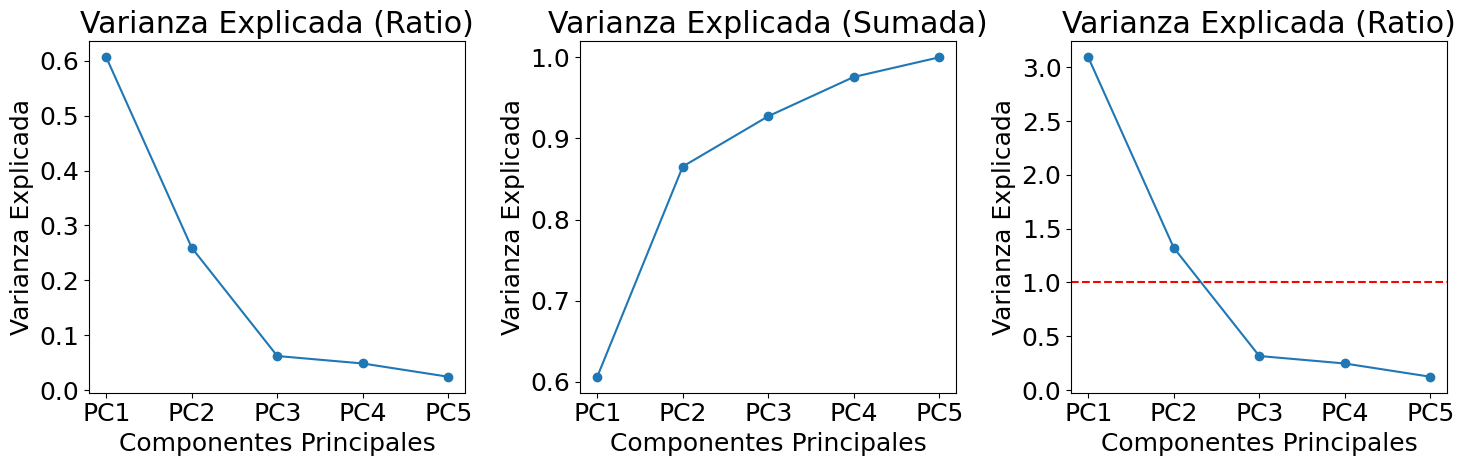

In [50]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
# varianza ratio
pca_food = PCA(n_components=n_comp)
pca_food.fit(food_standard)
ax[0].plot(np.arange(1, n_comp+1), pca_food.explained_variance_ratio_, marker = 'o')
ax[0].set_xticks(np.arange(1, n_comp+1))
ax[0].set_xticklabels([f'PC{i+1}' for i in range(n_comp)])
ax[0].set_xlabel('Componentes Principales')
ax[0].set_ylabel('Varianza Explicada')
ax[0].set_title('Varianza Explicada (Ratio)')
# Varianza sumada
com_sum = np.cumsum(pca_food.explained_variance_ratio_)
ax[1].plot(np.arange(1, n_comp+1), com_sum, marker = 'o')
ax[1].set_xticks(np.arange(1, n_comp+1))
ax[1].set_xticklabels([f'PC{i+1}' for i in range(n_comp)])
ax[1].set_xlabel('Componentes Principales')
ax[1].set_ylabel('Varianza Explicada')
ax[1].set_title('Varianza Explicada (Sumada)')
# criterio de Kaiser
ax[2].plot(np.arange(1, n_comp+1), pca_food.explained_variance_, marker = 'o')
ax[2].set_xticks(np.arange(1, n_comp+1))
ax[2].set_xticklabels([f'PC{i+1}' for i in range(n_comp)])
ax[2].axhline(y=1, color='r', linestyle='--')
ax[2].set_xlabel('Componentes Principales')
ax[2].set_ylabel('Varianza Explicada')
ax[2].set_title('Varianza Explicada (Ratio)')
fig.tight_layout()
plt.show()

In [52]:
variance_df = pd.DataFrame(index = ['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
                           columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
variance_df.loc['Standard Deviation'] = [round(x,2) for x in np.sqrt(pca_food.explained_variance_)]
variance_df.loc['Proportion of Variance'] = [round(x,2) for x in pca_food.explained_variance_ratio_]
variance_df.loc['Cumulative Proportion'] = [round(x,2) for x in np.cumsum(pca_food.explained_variance_ratio_)]
variance_df

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,1.76,1.15,0.56,0.5,0.35
Proportion of Variance,0.61,0.26,0.06,0.05,0.02
Cumulative Proportion,0.61,0.87,0.93,0.98,1.0
